#Data preparation

In [264]:
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import minimize

##Data accessing via Github and data cleaning

###Countries to Regions

In [265]:
df_CountriesToRegions = pd.read_excel('https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/CountriesToRegions.xlsx')
#drop useless data

df_CountriesToRegions = df_CountriesToRegions.iloc[4:]

# reset column name
new_header = df_CountriesToRegions.iloc[0]  # new column name
df_CountriesToRegions = df_CountriesToRegions[1:]
df_CountriesToRegions.columns = new_header

df_CountriesToRegions.reset_index(drop=True, inplace=True)
df_PAC = df_CountriesToRegions[df_CountriesToRegions['Region']=="PAC"]
df_PAC

4,Code,Name,Region
3,AU,AUSTRALIA,PAC
34,HK,HONG KONG,PAC
47,JP,JAPAN,PAC
68,NZ,NEW ZEALAND,PAC
83,SG,SINGAPORE,PAC


Here we get 5 Pacific countries and areas: Australia, Hong Kong, Japan, New Zealand and Singaore

###Return Index

In [266]:
df_DS_RI_T_USD_M = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/DS_RI_T_USD_M.xlsx")
df_return_PAC = df_DS_RI_T_USD_M[df_DS_RI_T_USD_M['ISIN'].str.startswith(('JP', 'NZ', 'HK', 'AU', 'SG'))]

df_RI = df_return_PAC.set_index('NAME').T[1:]

# reset
df_RI.reset_index(inplace=True)
df_RI.rename(columns={'index': 'Date'}, inplace=True)

# put it into date form
df_RI['Date'] = pd.to_datetime(df_RI['Date']).dt.date
df_RI.set_index('Date', inplace=True)
df_RI.index.name = ''
df_RI.columns.name = ''

df_RI = df_RI.apply(pd.to_numeric, errors='coerce')

df_RI

,ADBRI,ARISTOCRAT LEISURE,AMP,ANSELL,ANZ GROUP HOLDINGS,ASX,BENDIGO & ADELAIDE BANK,BHP GROUP,BANK OF QLND.,BEACH ENERGY,...,OVERSEA-CHINESE BKG.,COSCO SHIPPING INTERNATIONAL,UOL GROUP,FRASER AND NEAVE,SINGAPORE TELECOM,KEPPEL,SINGAPORE AIRLINES,OUE,FLEX,GENTING SINGAPORE
,,,,,,,,,,,,,,,,,,,,,
2000-01-31,496.60,502.03,42.82,1273.78,3300.94,196.15,143.68,2614.99,273.95,14.40,...,390.76,236.64,78.30,292.29,45.33,77.98,637.36,112.38,1394.74,23.96
2000-02-29,339.60,358.67,40.21,1014.28,3029.37,225.89,151.44,2166.89,274.48,12.29,...,289.76,229.06,69.23,261.80,44.39,75.75,565.12,97.99,1708.77,25.42
2000-03-31,335.65,305.57,41.90,988.27,3125.43,207.68,139.33,2380.80,279.87,14.36,...,283.96,225.33,70.91,269.05,38.99,79.50,569.49,99.65,1977.19,23.37
2000-04-30,296.32,292.49,38.91,874.95,3433.35,183.72,137.13,2370.44,260.26,11.05,...,313.98,198.21,71.62,304.49,39.37,78.45,631.12,96.24,1971.93,22.51
2000-05-31,251.09,337.63,38.70,1000.15,3457.02,140.03,125.10,2244.25,257.60,8.91,...,262.31,184.43,69.36,281.63,37.06,64.41,530.45,90.33,1528.07,21.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,4558.87,5793.02,13.42,6835.92,27467.00,3602.09,960.90,36229.72,1593.69,122.46,...,2319.17,848.17,1189.46,2766.94,144.36,1263.99,764.42,534.08,999.86,170.78
2022-09-30,3577.98,5016.54,11.83,6089.40,25861.73,3139.73,800.26,32573.93,1391.74,99.85,...,2206.34,758.84,1111.34,2572.65,142.50,1174.83,712.48,496.41,935.30,168.18
2022-10-31,3064.06,5625.01,13.54,6803.43,28968.91,2945.99,920.55,31722.59,1572.57,106.44,...,2293.94,720.54,1048.94,2595.91,135.80,1194.69,745.12,487.86,1099.23,174.88


###Market value

In [267]:
df_DS_MV_USD_M = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/DS_MV_USD_M.xlsx")
PAC = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_MV_PAC = df_DS_MV_USD_M[df_DS_MV_USD_M['ISIN'].str.startswith(PAC)]

# df_MV_full includes market value during 2000-2022
df_MV_full = df_MV_PAC.set_index('NAME').T[1:]
df_MV_full.reset_index(inplace=True)
df_MV_full.rename(columns={'index': 'Date'}, inplace=True)
df_MV_full['Date'] = pd.to_datetime(df_MV_full['Date']).dt.date
df_MV_full.set_index('Date', inplace=True)
df_MV_full.index = pd.to_datetime(df_MV_full.index)
df_MV = df_MV_full[(df_MV_full.index.year >= 2008) & (df_MV_full.index.year <= 2022)]

# df_MV includes data during 2008-2022
df_MV

NAME,ADBRI,ARISTOCRAT LEISURE,AMP,ANSELL,ANZ GROUP HOLDINGS,ASX,BENDIGO & ADELAIDE BANK,BHP GROUP,BANK OF QLND.,BEACH ENERGY,...,OVERSEA-CHINESE BKG.,COSCO SHIPPING INTERNATIONAL,UOL GROUP,FRASER AND NEAVE,SINGAPORE TELECOM,KEPPEL,SINGAPORE AIRLINES,OUE,FLEX,GENTING SINGAPORE
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,1705.69,4101.94,14054.2,1455.21,44566.76,7224.26,2871.02,110963.47,1906.0,1098.98,...,16433.21,7025.24,2027.48,4698.07,40995.48,12674.95,12886.26,2133.0,9735.06,4144.9
2008-02-29,1803.14,4500.43,14117.77,1642.39,39530.5,6730.36,2435.46,124254.08,1895.0,1206.01,...,17175.12,6548.97,2226.48,4875.25,43956.36,12274.8,13048.53,2182.26,8461.07,4316.88
2008-03-31,1690.25,4054.04,13434.94,1452.44,39549.63,5843.1,2797.51,109707.21,2194.1,1026.97,...,18376.03,5994.2,2229.67,4882.62,45169.57,11409.14,13427.16,1994.34,7835.25,4193.12
2008-04-30,1775.59,3273.96,13833.88,1476.04,39654.2,5788.44,2994.17,133684.0,2233.35,1015.87,...,20380.07,5211.45,2228.05,4886.7,45264.11,12090.11,13981.16,2024.36,8669.68,4327.19
2008-05-31,1892.95,3286.11,13121.04,1428.51,39724.26,5610.26,3623.45,139195.82,2274.95,1418.59,...,19876.98,5615.21,2276.57,5018.07,44479.86,14138.39,13851.34,2015.38,8957.41,4308.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,988.76,16276.49,2608.49,2323.07,46794.86,10411.65,3501.62,140996.44,3119.84,2674.34,...,39125.34,301.75,4189.65,1333.62,31014.26,9487.04,11354.32,934.47,8122.86,6718.37
2022-09-30,772.08,14002.99,2299.46,2064.05,43830.46,8932.18,2830.06,125463.44,2709.6,2178.19,...,37221.84,269.97,3914.76,1235.84,30614.15,8817.84,10582.81,862.13,7598.37,6616.27
2022-10-31,657.29,15640.27,2543.69,2300.57,48869.15,8381.02,3269.44,121023.8,3046.74,2319.53,...,38699.68,256.34,3694.94,1242.86,29175.24,8966.93,11067.52,765.58,8865.51,6879.75


In [268]:
df_DS_MV_USD_Y = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/DS_MV_USD_Y.xlsx")
PAC = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_MV_PAC_Y = df_DS_MV_USD_Y[df_DS_MV_USD_Y['ISIN'].str.startswith(PAC)]
df_MV_PAC_Y_2007 =  df_MV_PAC_Y.loc[:,'x2007':'x2021']
df_MV_PAC_Y_2007.columns = df_MV_PAC_Y_2007.columns.str.replace('x', '', regex=False)
df_MV_PAC_Y_2007.insert(0, 'NAME', df_MV_PAC_Y['NAME'])
df_MV_PAC_Y_2007.insert(0, 'ISIN', df_MV_PAC_Y['ISIN'])
df_MV_PAC_Y_2007.drop_duplicates(inplace=True)
df_MV_PAC_Y_2007


,ISIN,NAME,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
13,AU000000ABC7,ADBRI,1659.21,808.90,1568.35,2148.43,1885.18,2064.60,2096.27,1893.93,2242.50,2554.37,3316.10,1955.78,1585.13,1686.14,1338.06
14,AU000000ALL7,ARISTOCRAT LEISURE,4586.37,1231.71,1928.34,1636.60,1225.11,1803.31,2313.68,3389.19,4732.80,7166.78,11836.51,9817.79,15113.34,15274.83,21211.91
15,AU000000AMP6,AMP,16379.96,7530.70,12473.19,11356.97,11911.28,14633.68,11616.44,13312.61,12545.83,10794.23,11846.95,5066.45,4626.19,4136.92,2398.35
16,AU000000ANN9,ANSELL,1468.12,1189.49,1310.67,1728.78,1947.62,2081.25,2824.92,2822.27,2397.58,2638.23,2724.45,2061.23,2664.25,3449.44,2927.39
17,AU000000ANZ3,ANZ GROUP HOLDINGS,46288.58,23005.51,52119.29,62134.23,56382.32,71351.76,79123.42,72392.23,59287.32,64672.83,66029.24,49409.65,49104.76,49844.19,56316.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,SG1U68934629,KEPPEL,14314.95,4787.91,9346.79,14186.75,12805.40,16197.88,16030.40,12139.96,8342.35,7285.71,10000.60,7884.45,9155.32,7411.01,6914.12
1372,SG1V61937297,SINGAPORE AIRLINES,14318.37,9273.25,12618.45,14290.01,9401.63,10559.46,9892.55,10503.37,9472.84,8031.08,9579.59,8292.28,8066.64,9642.56,11020.99
1373,SG2B80958517,OUE,2045.76,1662.39,1272.47,2520.99,1589.78,2234.02,1943.59,1511.16,1238.58,1192.43,1373.51,1029.83,1087.72,891.27,959.97
1374,SG9999000020,FLEX,10034.61,2072.30,5937.68,6014.67,4036.65,4132.74,4722.47,6472.93,6236.18,7759.84,9507.20,4007.32,6414.85,9010.81,8626.52


In [269]:
MV_Y = df_MV_PAC_Y_2007.set_index('NAME').T[1:]
MV_Y.reset_index(inplace=True)
MV_Y.rename(columns={'index': 'Date'}, inplace=True)
MV_Y.set_index('Date', inplace=True)
MV_Y

NAME,ADBRI,ARISTOCRAT LEISURE,AMP,ANSELL,ANZ GROUP HOLDINGS,ASX,BENDIGO & ADELAIDE BANK,BHP GROUP,BANK OF QLND.,BEACH ENERGY,...,OVERSEA-CHINESE BKG.,COSCO SHIPPING INTERNATIONAL,UOL GROUP,FRASER AND NEAVE,SINGAPORE TELECOM,KEPPEL,SINGAPORE AIRLINES,OUE,FLEX,GENTING SINGAPORE
Date,,,,,,,,,,,,,,,,,,,,,
2007,1659.21,4586.37,16379.96,1468.12,46288.58,9084.7,3335.24,118285.73,2261.62,1171.1,...,18005.83,8985.07,2499.66,5684.45,44236.84,14314.95,14318.37,2045.76,10034.61,4583.18
2008,808.9,1231.71,7530.7,1189.49,23005.51,3974.39,2235.63,71224.48,1094.45,691.99,...,10828.71,1476.5,1226.63,2844.12,28188.07,4787.91,9273.25,1662.39,2072.3,3010.21
2009,1568.35,1928.34,12473.19,1310.67,52119.29,5414.32,3099.0,130146.74,2209.3,894.12,...,21033.63,1897.97,2271.4,4168.23,35288.85,9346.79,12618.45,1272.47,5937.68,10820.64
2010,2148.43,1636.6,11356.97,1728.78,62134.23,6764.41,3647.11,155665.75,2365.12,974.46,...,25767.87,3740.71,2883.86,7029.83,37939.68,14186.75,14290.01,2520.99,6014.67,20823.48
2011,1885.18,1225.11,11911.28,1947.62,56382.32,5490.63,3157.79,113331.92,1720.66,1408.18,...,20779.44,1511.09,2369.97,6769.41,37990.24,12805.4,9401.63,1589.78,4036.65,14202.26
2012,2064.6,1803.31,14633.68,2081.25,71351.76,5674.78,3550.25,123704.5,2387.49,1941.68,...,27410.46,1640.71,3762.52,11422.61,43073.11,16197.88,10559.46,2234.02,4132.74,13847.16
2013,2096.27,2313.68,11616.44,2824.92,79123.42,6366.76,4309.69,109157.05,3509.15,1635.44,...,27799.52,1338.99,3779.28,4005.34,46216.26,16030.4,9892.55,1943.59,4722.47,14478.72
2014,1893.93,3389.19,13312.61,2822.27,72392.23,5820.69,4727.12,77193.05,3657.91,1109.59,...,31518.57,946.31,4134.78,2976.79,46923.62,12139.96,10503.37,1511.16,6472.93,9858.29
2015,2242.5,4732.8,12545.83,2397.58,59287.32,5980.61,3971.23,41733.52,3811.37,464.48,...,25566.96,726.1,3502.29,2121.73,41246.25,8342.35,9472.84,1238.58,6236.18,6564.42


###Carbon footprint

In [270]:
df_TC_Scope1 = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope1.xlsx")
df_TC_Scope1_2007 =  df_TC_Scope1.loc[:, 2007:]

df_TC_Scope1_2007.insert(0, 'NAME', df_TC_Scope1['NAME'])
df_TC_Scope1_2007.insert(0, 'ISIN', df_TC_Scope1['ISIN'])



prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope1_2007_PAC = df_TC_Scope1_2007[df_TC_Scope1_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope1_2007_PAC.isna().sum()

ISIN    0
NAME    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    1
2016    0
2017    0
2018    0
2019    1
2020    1
2021    0
dtype: int64

In [271]:
#find the missing data
missing_values_2015_1c = df_TC_Scope1_2007_PAC[df_TC_Scope1_2007_PAC[2015].isna()]
missing_values_2019_1c = df_TC_Scope1_2007_PAC[df_TC_Scope1_2007_PAC[2019].isna()]
missing_values_2020_1c = df_TC_Scope1_2007_PAC[df_TC_Scope1_2007_PAC[2020].isna()]

names_with_missing_values_2015_1c = missing_values_2015_1c['NAME']
names_with_missing_values_2019_1c = missing_values_2019_1c['NAME']
names_with_missing_values_2020_1c = missing_values_2020_1c['NAME']

# print the missing “NAME”
print("Names with missing values in Scope 1 in 2015:", names_with_missing_values_2015_1c)
print("Names with missing values in Scope 1 in 2019:", names_with_missing_values_2019_1c)
print("Names with missing values in Scope 1 in 2020:", names_with_missing_values_2020_1c)

Names with missing values in Scope 1 in 2015: 891    Komori Corporation
Name: NAME, dtype: object
Names with missing values in Scope 1 in 2019: 859    Kawasaki Kisen Kaisha, Ltd.
Name: NAME, dtype: object
Names with missing values in Scope 1 in 2020: 823    AEON Financial Service Co., Ltd.
Name: NAME, dtype: object


In [272]:
# missing value for 2015
for index in missing_values_2015_1c.index:
    prev_year_value = df_TC_Scope1_2007_PAC.at[index, 2014]
    next_year_value = df_TC_Scope1_2007_PAC.at[index, 2016]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope1_2007_PAC.at[index, 2015] = (prev_year_value + next_year_value) / 2

# missing value for 2019
for index in missing_values_2019_1c.index:
    prev_year_value = df_TC_Scope1_2007_PAC.at[index, 2018]
    next_year_value = df_TC_Scope1_2007_PAC.at[index, 2020]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope1_2007_PAC.at[index, 2019] = (prev_year_value + next_year_value) / 2

# missing value for 2020
for index in missing_values_2020_1c.index:
    prev_year_value = df_TC_Scope1_2007_PAC.at[index, 2019]
    next_year_value = df_TC_Scope1_2007_PAC.at[index, 2021]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope1_2007_PAC.at[index, 2020] = (prev_year_value + next_year_value) / 2

In [273]:
Scope1 = df_TC_Scope1_2007_PAC.set_index('NAME').T[1:]

# Resetting index should put the years as a column, not an index
Scope1.reset_index(inplace=True)

# Renaming the new column to 'Date'
Scope1.rename(columns={'index': 'Date'}, inplace=True)
# Convert the 'Date' column to a datetime and extract the year
Scope1['Date'] = pd.to_datetime(Scope1['Date'], format='%Y').dt.year

# Set the 'Date' column as the index
Scope1.set_index('Date', inplace=True)
Scope1.index.name = None
Scope1.columns.name = None

# Convert all the other data to numeric values
Scope1 = Scope1.apply(pd.to_numeric, errors='coerce')
Scope1.isna().sum().sum()

0

In [274]:
df_TC_Scope2 = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope2.xlsx")
df_TC_Scope2_2007 =  df_TC_Scope2.loc[:, 2007:]

df_TC_Scope2_2007.insert(0, 'NAME', df_TC_Scope2['NAME'])
df_TC_Scope2_2007.insert(0, 'ISIN', df_TC_Scope2['ISIN'])


prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope2_2007_PAC = df_TC_Scope2_2007[df_TC_Scope2_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope2_2007_PAC.isna().sum()

ISIN    0
NAME    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    1
2016    0
2017    0
2018    0
2019    1
2020    1
2021    0
dtype: int64

In [275]:
#find the missing data
missing_values_2015_2c = df_TC_Scope2_2007_PAC[df_TC_Scope2_2007_PAC[2015].isna()]
missing_values_2019_2c = df_TC_Scope2_2007_PAC[df_TC_Scope2_2007_PAC[2019].isna()]
missing_values_2020_2c = df_TC_Scope2_2007_PAC[df_TC_Scope2_2007_PAC[2020].isna()]

names_with_missing_values_2015_2c = missing_values_2015_2c['NAME']
names_with_missing_values_2019_2c = missing_values_2019_2c['NAME']
names_with_missing_values_2020_2c = missing_values_2020_2c['NAME']

# print the missing “NAME”
print("Names with missing values in Scope 2 in 2015:", names_with_missing_values_2015_2c)
print("Names with missing values in Scope 2 in 2019:", names_with_missing_values_2019_2c)
print("Names with missing values in Scope 2 in 2020:", names_with_missing_values_2020_2c)

Names with missing values in Scope 2 in 2015: 891    Komori Corporation
Name: NAME, dtype: object
Names with missing values in Scope 2 in 2019: 859    Kawasaki Kisen Kaisha, Ltd.
Name: NAME, dtype: object
Names with missing values in Scope 2 in 2020: 823    AEON Financial Service Co., Ltd.
Name: NAME, dtype: object


In [276]:
# missing value for 2015
for index in missing_values_2015_2c.index:
    prev_year_value = df_TC_Scope2_2007_PAC.at[index, 2014]
    next_year_value = df_TC_Scope2_2007_PAC.at[index, 2016]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope2_2007_PAC.at[index, 2015] = (prev_year_value + next_year_value) / 2

# missing value for 2019
for index in missing_values_2019_2c.index:
    prev_year_value = df_TC_Scope2_2007_PAC.at[index, 2018]
    next_year_value = df_TC_Scope2_2007_PAC.at[index, 2020]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope2_2007_PAC.at[index, 2019] = (prev_year_value + next_year_value) / 2

# missing value for 2020
for index in missing_values_2020_2c.index:
    prev_year_value = df_TC_Scope2_2007_PAC.at[index, 2019]
    next_year_value = df_TC_Scope2_2007_PAC.at[index, 2021]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope2_2007_PAC.at[index, 2020] = (prev_year_value + next_year_value) / 2

In [277]:
Scope2 = df_TC_Scope2_2007_PAC.set_index('NAME').T[1:]

# Resetting index should put the years as a column, not an index
Scope2.reset_index(inplace=True)

# Renaming the new column to 'Date'
Scope2.rename(columns={'index': 'Date'}, inplace=True)
# Convert the 'Date' column to a datetime and extract the year
Scope2['Date'] = pd.to_datetime(Scope2['Date'], format='%Y').dt.year

# Set the 'Date' column as the index
Scope2.set_index('Date', inplace=True)
Scope2.index.name = None
Scope2.columns.name = None

# Convert all the other data to numeric values
Scope2 = Scope2.apply(pd.to_numeric, errors='coerce')
Scope2.isna().sum().sum()

0

In [278]:
df_TC_Scope3 = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope3.xlsx")
df_TC_Scope3_2007 =  df_TC_Scope3.loc[:, 2007:]

df_TC_Scope3_2007.insert(0, 'NAME', df_TC_Scope3['NAME'])
df_TC_Scope3_2007.insert(0, 'ISIN', df_TC_Scope3['ISIN'])

# Display the modified DataFrame
#df_TC_Scope3_2007

prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope3_2007_PAC = df_TC_Scope3_2007[df_TC_Scope3_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope3_2007_PAC.isna().sum()

ISIN    0
NAME    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    1
2016    0
2017    0
2018    0
2019    1
2020    1
2021    0
dtype: int64

In [279]:
#find the missing data
missing_values_2015_3c = df_TC_Scope3_2007_PAC[df_TC_Scope3_2007_PAC[2015].isna()]
missing_values_2019_3c = df_TC_Scope3_2007_PAC[df_TC_Scope3_2007_PAC[2019].isna()]
missing_values_2020_3c = df_TC_Scope3_2007_PAC[df_TC_Scope3_2007_PAC[2020].isna()]

names_with_missing_values_2015_3c = missing_values_2015_3c['NAME']
names_with_missing_values_2019_3c = missing_values_2019_3c['NAME']
names_with_missing_values_2020_3c = missing_values_2020_3c['NAME']

# print the missing “NAME”
print("Names with missing values in Scope 3 in 2015:", names_with_missing_values_2015_3c)
print("Names with missing values in Scope 3 in 2019:", names_with_missing_values_2019_3c)
print("Names with missing values in Scope 3 in 2020:", names_with_missing_values_2020_3c)

Names with missing values in Scope 3 in 2015: 891    Komori Corporation
Name: NAME, dtype: object
Names with missing values in Scope 3 in 2019: 859    Kawasaki Kisen Kaisha, Ltd.
Name: NAME, dtype: object
Names with missing values in Scope 3 in 2020: 823    AEON Financial Service Co., Ltd.
Name: NAME, dtype: object


In [280]:
# missing value for 2015
for index in missing_values_2015_3c.index:
    prev_year_value = df_TC_Scope3_2007_PAC.at[index, 2014]
    next_year_value = df_TC_Scope3_2007_PAC.at[index, 2016]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope3_2007_PAC.at[index, 2015] = (prev_year_value + next_year_value) / 2

# missing value for 2019
for index in missing_values_2019_3c.index:
    prev_year_value = df_TC_Scope3_2007_PAC.at[index, 2018]
    next_year_value = df_TC_Scope3_2007_PAC.at[index, 2020]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope3_2007_PAC.at[index, 2019] = (prev_year_value + next_year_value) / 2

# missing value for 2020
for index in missing_values_2020_3c.index:
    prev_year_value = df_TC_Scope3_2007_PAC.at[index, 2019]
    next_year_value = df_TC_Scope3_2007_PAC.at[index, 2021]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope3_2007_PAC.at[index, 2020] = (prev_year_value + next_year_value) / 2

In [281]:
Scope3 = df_TC_Scope3_2007_PAC.set_index('NAME').T[1:]

# Resetting index should put the years as a column, not an index
Scope3.reset_index(inplace=True)

# Renaming the new column to 'Date'
Scope3.rename(columns={'index': 'Date'}, inplace=True)
# Convert the 'Date' column to a datetime and extract the year
Scope3['Date'] = pd.to_datetime(Scope3['Date'], format='%Y').dt.year

# Set the 'Date' column as the index
Scope3.set_index('Date', inplace=True)
Scope3.index.name = None
Scope3.columns.name = None

# Convert all the other data to numeric values
Scope3 = Scope3.apply(pd.to_numeric, errors='coerce')
Scope3.isna().sum().sum()

0

In [282]:
Scope123 = Scope1 + Scope2 + Scope3
Scope123


,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,3.810932e+06,151599.313930,499341.717962,211614.636937,473847.608620,18627.155729,12869.954273,6.180106e+07,10677.592591,219230.992137,...,88078.633074,649254.421297,9.711741e+04,1.871422e+06,6.356727e+05,2.234273e+06,1.594973e+07,23198.538012,2.981299e+06,62521.829352
2008,3.910787e+06,111767.187970,444812.730101,221009.473602,432772.588447,21714.703812,12679.671925,6.803453e+07,12597.076290,200392.866624,...,224501.983367,861461.501551,1.246693e+05,1.936966e+06,7.293104e+05,2.811715e+06,1.587090e+07,20011.903419,4.144252e+06,49022.006002
2009,3.846787e+06,121175.598087,423075.301542,211500.369148,501466.315362,31466.834247,19079.670719,6.349068e+07,14397.389932,247225.458088,...,296432.138933,666866.404457,1.587713e+05,2.268883e+06,6.883744e+05,2.988781e+06,1.611784e+07,17230.399005,3.018775e+06,40678.272638
2010,3.953953e+06,94668.474650,323682.107178,200864.490605,542887.941766,27307.337999,26939.700138,4.411822e+07,16716.475477,192803.985306,...,317034.551375,824929.234605,2.158149e+05,2.416038e+06,1.043784e+06,2.662198e+06,1.401166e+07,26312.360752,3.653972e+06,236707.776640
2011,3.913679e+06,101192.111373,481741.606449,376801.742607,655924.078288,30088.635188,30632.447691,5.912018e+07,21385.655484,175612.934288,...,316467.484681,890580.931676,3.567390e+05,2.605181e+06,8.345529e+05,2.794528e+06,1.488170e+07,39216.685002,4.788639e+06,285742.475007
2012,4.044934e+06,81880.877400,697425.122506,360793.087099,661486.799641,34402.232247,61264.244068,5.726652e+07,21570.668453,269881.477049,...,432895.354837,725821.895237,1.829056e+05,1.685274e+06,1.245551e+06,3.181579e+06,1.550871e+07,46546.096735,4.756614e+06,259777.280985
2013,3.913859e+06,108153.412590,610134.419208,388935.584646,672971.873210,33309.979502,62346.945385,6.358478e+07,21656.954965,164608.142575,...,349131.794250,675425.829174,1.556537e+05,1.918256e+06,1.224562e+06,2.794518e+06,1.592255e+07,46511.777608,3.757673e+06,257023.215038
2014,3.741023e+06,112940.918698,519205.909356,474334.331509,739961.794753,33711.693645,60548.546820,6.239798e+07,22585.501203,158654.904090,...,408124.614763,814864.435293,2.180079e+05,1.487611e+06,1.176975e+06,2.988244e+06,1.572047e+07,46680.418860,4.199615e+06,242646.301085
2015,3.609542e+06,167654.651836,335957.657296,486084.092066,713330.407304,33507.112302,57493.755737,4.784025e+07,22862.310921,111256.014708,...,376915.531955,626840.494299,1.805521e+05,1.312471e+06,1.183930e+06,4.748981e+06,1.540610e+07,42446.278600,4.229170e+06,207871.348301
2016,3.391322e+06,218275.326142,362356.676000,481756.449489,637550.919000,34032.415000,58769.526962,2.583645e+07,22376.193012,86955.553610,...,419636.137117,482617.294602,1.632463e+06,1.390700e+06,1.182429e+06,2.072569e+06,1.576798e+07,77886.709725,4.110369e+06,202201.127373


###Carbon Intensity

In [283]:
df_TC_Scope1Intensity = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope1Intensity.xlsx")
df_TC_Scope1Intensity_2007 =  df_TC_Scope1Intensity.loc[:, 2007:]

df_TC_Scope1Intensity_2007.insert(0, 'NAME', df_TC_Scope1Intensity['NAME'])
df_TC_Scope1Intensity_2007.insert(0, 'ISIN', df_TC_Scope1Intensity['ISIN'])



prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope1Intensity_2007_PAC = df_TC_Scope1Intensity_2007[df_TC_Scope1Intensity_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope1Intensity_2007_PAC.isna().sum()

ISIN    0
NAME    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    1
2016    0
2017    0
2018    0
2019    1
2020    1
2021    0
dtype: int64

In [284]:
#find the missing data
missing_values_2015_1 = df_TC_Scope1Intensity_2007_PAC[df_TC_Scope1Intensity_2007_PAC[2015].isna()]
missing_values_2019_1 = df_TC_Scope1Intensity_2007_PAC[df_TC_Scope1Intensity_2007_PAC[2019].isna()]
missing_values_2020_1 = df_TC_Scope1Intensity_2007_PAC[df_TC_Scope1Intensity_2007_PAC[2020].isna()]

names_with_missing_values_2015_1 = missing_values_2015_1['NAME']
names_with_missing_values_2019_1 = missing_values_2019_1['NAME']
names_with_missing_values_2020_1 = missing_values_2020_1['NAME']

# print the missing “NAME”
print("Names with missing values in Scope 1 in 2015:", names_with_missing_values_2015_1)
print("Names with missing values in Scope 1 in 2019:", names_with_missing_values_2019_1)
print("Names with missing values in Scope 1 in 2020:", names_with_missing_values_2020_1)

Names with missing values in Scope 1 in 2015: 891    Komori Corporation
Name: NAME, dtype: object
Names with missing values in Scope 1 in 2019: 859    Kawasaki Kisen Kaisha, Ltd.
Name: NAME, dtype: object
Names with missing values in Scope 1 in 2020: 823    AEON Financial Service Co., Ltd.
Name: NAME, dtype: object


In [285]:
df_TC_Scope2Intensity = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope2Intensity.xlsx")
df_TC_Scope2Intensity_2007 =  df_TC_Scope2Intensity.loc[:, 2007:]

df_TC_Scope2Intensity_2007.insert(0, 'NAME', df_TC_Scope2Intensity['NAME'])
df_TC_Scope2Intensity_2007.insert(0, 'ISIN', df_TC_Scope2Intensity['ISIN'])

prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope2Intensity_2007_PAC = df_TC_Scope2Intensity_2007[df_TC_Scope2Intensity_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope2Intensity_2007_PAC.isna().sum()

ISIN    0
NAME    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    1
2016    0
2017    0
2018    0
2019    1
2020    1
2021    0
dtype: int64

In [286]:
df_TC_Scope3Intensity = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/TC_Scope3Intensity.xlsx")
df_TC_Scope3Intensity_2007 =  df_TC_Scope3Intensity.loc[:, 2007:]

df_TC_Scope3Intensity_2007.insert(0, 'NAME', df_TC_Scope3Intensity['NAME'])
df_TC_Scope3Intensity_2007.insert(0, 'ISIN', df_TC_Scope3Intensity['ISIN'])



prefixes = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_TC_Scope3Intensity_2007_PAC = df_TC_Scope3Intensity_2007[df_TC_Scope3Intensity_2007['ISIN'].str.startswith(prefixes)]
df_TC_Scope3Intensity_2007_PAC.isna().sum()

ISIN    0
NAME    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    1
2016    0
2017    0
2018    0
2019    1
2020    1
2021    0
dtype: int64

In [287]:
missing_values_2015_2  = df_TC_Scope2Intensity_2007_PAC[df_TC_Scope2Intensity_2007_PAC[2015].isna()]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          = df_TC_Scope2Intensity_2007_PAC[df_TC_Scope3Intensity_2007_PAC[2015].isna()]
missing_values_2019_2  = df_TC_Scope2Intensity_2007_PAC[df_TC_Scope2Intensity_2007_PAC[2019].isna()]
missing_values_2020_2  = df_TC_Scope2Intensity_2007_PAC[df_TC_Scope2Intensity_2007_PAC[2020].isna()]

names_with_missing_values_2015_2 = missing_values_2015_2['NAME']
names_with_missing_values_2019_2 = missing_values_2019_2['NAME']
names_with_missing_values_2020_2 = missing_values_2020_2['NAME']

# print missing“NAME”
print("Names with missing values in Scope 2 in 2015:", names_with_missing_values_2015_2)
print("Names with missing values in Scope 2 in 2019:", names_with_missing_values_2019_2)
print("Names with missing values in Scope 2 in 2020:", names_with_missing_values_2020_2)

Names with missing values in Scope 2 in 2015: 891    Komori Corporation
Name: NAME, dtype: object
Names with missing values in Scope 2 in 2019: 859    Kawasaki Kisen Kaisha, Ltd.
Name: NAME, dtype: object
Names with missing values in Scope 2 in 2020: 823    AEON Financial Service Co., Ltd.
Name: NAME, dtype: object


<ipython-input-287-5ff0778acf83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_2015_2  = df_TC_Scope2Intensity_2007_PAC[df_TC_Scope2Intensity_2007_PAC[2015].isna()]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [288]:
#find the missing data
missing_values_2015_3 = df_TC_Scope3Intensity_2007_PAC[df_TC_Scope3Intensity_2007_PAC[2015].isna()]
missing_values_2019_3 = df_TC_Scope3Intensity_2007_PAC[df_TC_Scope3Intensity_2007_PAC[2019].isna()]
missing_values_2020_3 = df_TC_Scope3Intensity_2007_PAC[df_TC_Scope3Intensity_2007_PAC[2020].isna()]

names_with_missing_values_2015_3 = missing_values_2015_3['NAME']
names_with_missing_values_2019_3 = missing_values_2019_3['NAME']
names_with_missing_values_2020_3 = missing_values_2020_3['NAME']

# print the missing “NAME”
print("Names with missing values in Scope 3 in 2015:", names_with_missing_values_2015_3)
print("Names with missing values in Scope 3 in 2019:", names_with_missing_values_2019_3)
print("Names with missing values in Scope 3 in 2020:", names_with_missing_values_2020_3)

Names with missing values in Scope 3 in 2015: 891    Komori Corporation
Name: NAME, dtype: object
Names with missing values in Scope 3 in 2019: 859    Kawasaki Kisen Kaisha, Ltd.
Name: NAME, dtype: object
Names with missing values in Scope 3 in 2020: 823    AEON Financial Service Co., Ltd.
Name: NAME, dtype: object


In [289]:
# missing value for 2015
for index in missing_values_2015_1.index:
    prev_year_value = df_TC_Scope1Intensity_2007_PAC.at[index, 2014]
    next_year_value = df_TC_Scope1Intensity_2007_PAC.at[index, 2016]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope1Intensity_2007_PAC.at[index, 2015] = (prev_year_value + next_year_value) / 2

# missing value for 2019
for index in missing_values_2019_1.index:
    prev_year_value = df_TC_Scope1Intensity_2007_PAC.at[index, 2018]
    next_year_value = df_TC_Scope1Intensity_2007_PAC.at[index, 2020]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope1Intensity_2007_PAC.at[index, 2019] = (prev_year_value + next_year_value) / 2

# missing value for 2020
for index in missing_values_2020_1.index:
    prev_year_value = df_TC_Scope1Intensity_2007_PAC.at[index, 2019]
    next_year_value = df_TC_Scope1Intensity_2007_PAC.at[index, 2021]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope1Intensity_2007_PAC.at[index, 2020] = (prev_year_value + next_year_value) / 2

In [290]:

for index in missing_values_2015_2.index:
    prev_year_value = df_TC_Scope2Intensity_2007_PAC.at[index, 2014]
    next_year_value = df_TC_Scope2Intensity_2007_PAC.at[index, 2016]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope2Intensity_2007_PAC.at[index, 2015] = (prev_year_value + next_year_value) / 2

for index in missing_values_2019_2.index:
    prev_year_value = df_TC_Scope2Intensity_2007_PAC.at[index, 2018]
    next_year_value = df_TC_Scope2Intensity_2007_PAC.at[index, 2020]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope2Intensity_2007_PAC.at[index, 2019] = (prev_year_value + next_year_value) / 2

for index in missing_values_2020_2.index:
    prev_year_value = df_TC_Scope2Intensity_2007_PAC.at[index, 2019]
    next_year_value = df_TC_Scope2Intensity_2007_PAC.at[index, 2021]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope2Intensity_2007_PAC.at[index, 2020] = (prev_year_value + next_year_value) / 2


In [291]:

for index in missing_values_2015_3.index:
    prev_year_value = df_TC_Scope3Intensity_2007_PAC.at[index, 2014]
    next_year_value = df_TC_Scope3Intensity_2007_PAC.at[index, 2016]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope3Intensity_2007_PAC.at[index, 2015] = (prev_year_value + next_year_value) / 2

for index in missing_values_2019_3.index:
    prev_year_value = df_TC_Scope3Intensity_2007_PAC.at[index, 2018]
    next_year_value = df_TC_Scope3Intensity_2007_PAC.at[index, 2020]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope3Intensity_2007_PAC.at[index, 2019] = (prev_year_value + next_year_value) / 2

for index in missing_values_2020_3.index:
    prev_year_value = df_TC_Scope3Intensity_2007_PAC.at[index, 2019]
    next_year_value = df_TC_Scope3Intensity_2007_PAC.at[index, 2021]
    if pd.notnull(prev_year_value) and pd.notnull(next_year_value):
        df_TC_Scope3Intensity_2007_PAC.at[index, 2020] = (prev_year_value + next_year_value) / 2


In [292]:
Scope1Intensity = df_TC_Scope1Intensity_2007_PAC.set_index('NAME').T[1:]

# Resetting index should put the years as a column, not an index
Scope1Intensity.reset_index(inplace=True)

# Renaming the new column to 'Date'
Scope1Intensity.rename(columns={'index': 'Date'}, inplace=True)
# Convert the 'Date' column to a datetime and extract the year
Scope1Intensity['Date'] = pd.to_datetime(Scope1Intensity['Date'], format='%Y').dt.year

# Set the 'Date' column as the index
Scope1Intensity.set_index('Date', inplace=True)
Scope1Intensity.index.name = None
Scope1Intensity.columns.name = None

# Convert all the other data to numeric values
Scope1Intensity = Scope1Intensity.apply(pd.to_numeric, errors='coerce')
Scope1Intensity

,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,3981.635866,21.872710,7.915177,22.869838,1.553564,0.613723,1.270021,541.852896,1.270021,378.534182,...,1.056085,179.459812,25.283153,44.360448,5.525788,105.995590,1526.552345,26.315700,21.872710,12.003084
2008,4708.597766,26.706200,7.389754,22.489190,1.437853,0.613434,1.229191,473.912693,1.229191,220.687360,...,1.060145,142.195237,24.500448,45.868409,5.702607,153.528249,1254.104134,26.099346,26.706200,11.743765
2009,3430.200715,21.055748,7.619538,22.015632,1.266409,0.101372,1.222585,423.861222,1.222585,364.395631,...,0.919053,93.486403,25.264814,45.323775,5.446864,144.813578,1390.332389,25.798646,21.055748,11.716474
2010,3121.593213,27.162586,0.040598,22.467910,1.125910,0.099783,1.207184,371.074084,1.207184,294.891497,...,0.900294,74.561452,27.386969,39.062440,1.298427,168.597740,1448.586153,24.487015,27.162586,12.346026
2011,2622.598688,19.657253,0.014377,83.435483,1.138105,0.095877,1.141461,275.989990,1.112104,209.754139,...,0.900734,45.170061,25.317421,33.936879,1.219052,173.822190,1246.135890,21.726612,2.889686,12.136576
2012,2459.985516,21.884867,0.008387,79.798604,0.975338,0.377419,3.052090,279.646165,1.018709,278.511462,...,0.835038,43.022286,23.845667,32.440720,0.596776,131.405092,1193.833229,20.047007,3.217152,11.432015
2013,2485.802766,21.556594,0.005940,78.601625,0.876176,0.256042,2.230442,333.494890,1.005586,113.871890,...,0.907669,44.146313,22.495518,31.664525,0.641776,112.529662,1197.386379,19.164333,3.168895,2.024057
2014,2202.993113,25.427663,0.006169,81.048912,0.918472,0.157308,2.310414,326.752521,1.264322,54.626601,...,1.106928,40.876060,23.122409,36.490192,0.740584,114.917016,1188.558744,18.617998,1.619544,1.668943
2015,2357.568411,25.008673,0.015059,81.419097,1.231182,0.104952,2.251458,463.751303,1.242411,85.522472,...,1.108739,40.031580,22.912767,35.581147,0.646483,465.157374,1167.415828,18.582658,3.515223,2.150161
2016,2254.118422,26.272780,0.006000,79.121278,1.122000,0.017000,3.414930,378.018086,1.063999,98.685889,...,0.981028,39.869617,501.338000,37.490313,0.592204,250.125448,1296.581000,15.785868,1.244000,2.190947


In [293]:
Scope1Intensity.isna().sum().sum()

0

In [294]:
Scope2Intensity = df_TC_Scope2Intensity_2007_PAC.set_index('NAME').T[1:]

# Resetting index should put the years as a column, not an index
Scope2Intensity.reset_index(inplace=True)

# Renaming the new column to 'Date'
Scope2Intensity.rename(columns={'index': 'Date'}, inplace=True)
# Convert the 'Date' column to a datetime and extract the year
Scope2Intensity['Date'] = pd.to_datetime(Scope2Intensity['Date'], format='%Y').dt.year

# Set the 'Date' column as the index
Scope2Intensity.set_index('Date', inplace=True)
Scope2Intensity.index.name = None
Scope2Intensity.columns.name = None

# Convert all the other data to numeric values
Scope2Intensity = Scope2Intensity.apply(pd.to_numeric, errors='coerce')
Scope2Intensity

,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,146.220388,3.359816,1.205534,15.455588,20.274744,7.719606,1.068693,714.735405,1.068693,52.184515,...,3.351724,22.671566,55.650253,29.313547,12.303873,27.678616,3.339734,82.803419,3.359816,41.344448
2008,141.581641,3.260708,0.604001,14.999677,17.598153,7.491892,1.037168,471.366087,1.037168,50.645169,...,2.850662,22.092873,46.529944,30.356146,11.906530,22.440994,3.199623,82.234629,3.260708,40.210608
2009,125.522106,3.234324,1.994363,14.878310,15.271507,15.475936,1.028776,571.506870,1.028776,50.235382,...,4.181081,22.069733,38.935489,30.254715,11.661012,24.083046,7.555619,80.896630,3.234324,39.819801
2010,107.534379,3.163237,1.619960,14.551298,12.954418,11.997649,1.006165,220.783750,1.006165,49.131254,...,4.191307,21.640941,33.962544,25.553238,35.461229,24.441772,3.345059,75.288931,3.163237,41.150530
2011,90.344448,3.018439,1.647564,79.900497,11.880930,9.208143,0.960107,292.716747,1.005167,46.882257,...,3.494353,20.725084,26.460785,24.058882,10.822613,22.062213,2.845544,68.491682,47.485792,39.567634
2012,80.590587,2.965517,1.259092,70.060539,11.175527,14.257468,23.122768,276.877468,0.987718,46.060285,...,3.498589,20.369105,38.309428,24.679539,32.816322,24.914884,3.502097,65.621145,46.652934,38.941728
2013,80.988116,2.921035,1.067926,69.009628,11.151376,13.656682,20.788545,374.423963,0.969075,18.815694,...,2.412948,20.057535,42.587969,22.974698,34.995650,32.498654,3.174227,63.309468,45.953114,52.077333
2014,77.625287,3.425050,1.151229,80.917125,10.152477,16.631317,21.116083,321.145945,1.133917,11.205390,...,2.982749,23.535404,41.781003,34.084899,38.530919,26.825922,3.032340,73.461141,43.291227,49.204891
2015,92.374682,3.463065,1.487618,77.034759,10.139230,17.997006,20.084767,394.300565,1.065412,0.584064,...,2.596995,22.391365,41.691335,32.661530,40.355974,31.293709,2.066681,68.986440,42.363087,59.670764
2016,78.479772,3.615910,1.065000,78.811848,9.159000,21.845000,23.094073,217.391304,1.079563,1.394053,...,2.384226,22.831038,922.642000,34.346251,45.595425,48.226940,2.103000,64.298108,45.146000,62.436219


In [295]:
Scope2Intensity.isna().sum().sum()

0

In [296]:
Scope3Intensity = df_TC_Scope3Intensity_2007_PAC.set_index('NAME').T[1:]

# Resetting index should put the years as a column, not an index
Scope3Intensity.reset_index(inplace=True)

# Renaming the new column to 'Date'
Scope3Intensity.rename(columns={'index': 'Date'}, inplace=True)
# Convert the 'Date' column to a datetime and extract the year
Scope3Intensity['Date'] = pd.to_datetime(Scope3Intensity['Date'], format='%Y').dt.year

# Set the 'Date' column as the index
Scope3Intensity.set_index('Date', inplace=True)
Scope3Intensity.index.name = None
Scope3Intensity.columns.name = None

# Convert all the other data to numeric values
Scope3Intensity = Scope3Intensity.apply(pd.to_numeric, errors='coerce')
Scope3Intensity

,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,762.367862,128.803640,44.175002,162.666773,26.626281,32.412047,25.718129,246.319679,25.718129,115.692207,...,28.558645,210.667639,114.798458,512.444882,55.495757,174.331551,139.412090,76.986813,128.803640,66.623741
2008,707.703926,120.415264,59.989209,148.061862,26.059799,29.826408,23.497296,226.376843,23.497296,99.724154,...,25.539951,193.084720,128.901139,485.144856,50.455039,167.474695,113.913679,69.623107,120.415264,57.842271
2009,786.710827,123.992723,60.745622,156.591041,25.210903,31.014699,24.757536,264.776508,24.757536,111.371012,...,28.290394,207.397229,157.142397,523.939545,52.963014,173.722600,133.862393,75.486784,123.992723,64.726042
2010,798.741705,121.223815,42.180864,148.418460,24.386622,30.117182,23.956683,243.746209,23.956683,105.322150,...,27.513641,194.856957,165.776411,523.095606,51.512404,149.051586,121.280996,66.498451,121.223815,63.633071
2011,734.457135,116.590216,40.861595,147.856316,24.770647,28.950963,23.033380,255.363152,23.128544,102.174840,...,25.903529,203.037919,176.998292,465.676604,49.454004,152.542392,115.305007,58.101928,116.592835,60.429662
2012,774.536608,111.984859,38.544440,137.360783,23.828847,27.933973,22.293986,236.266858,22.387776,98.547311,...,25.333694,179.454634,137.293594,535.992081,47.619220,132.615774,111.536087,53.505785,111.987451,59.721570
2013,737.954333,110.305086,30.380419,135.300371,24.740054,27.505770,21.959576,255.954171,22.043814,97.108757,...,23.799825,176.666623,118.906102,494.889619,46.824955,137.421487,110.232091,50.929034,110.307639,58.963950
2014,821.982118,115.937968,31.573138,136.319921,27.520511,28.633293,22.569407,251.430930,22.676037,98.434403,...,24.679163,177.901971,138.086759,700.894302,48.669078,143.289096,106.611602,49.949585,115.940957,56.526002
2015,954.114742,107.391213,30.342397,137.020031,27.338997,28.245571,22.244463,213.734432,22.314466,97.454469,...,24.040800,182.498442,129.574607,771.967688,47.574625,137.851256,105.872605,47.846635,115.861417,57.217867
2016,936.400666,109.532914,31.626000,148.371840,23.579000,29.623000,25.522856,240.397008,23.630147,109.644382,...,25.150766,197.851170,141.292000,898.881050,50.489294,124.731846,137.213000,41.597580,121.937000,60.741989


In [297]:
Scope3Intensity.isna().sum().sum()

0

###Sectors

In [298]:
df_Static_Carbon = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/Static_Carbon.xlsx")
df_Static_Carbon

,Company,ISIN,GICSSectorName,Country,Region
0,Schlumberger Limited,AN8068571086,Energy,UNITED STATES,AMER
1,Aluar Aluminio Argentino S.A.I.C.,ARALUA010258,Materials,ARGENTINA,EM
2,Banco BBVA Argentina S.A.,ARP125991090,Financials,ARGENTINA,EM
3,Ternium Argentina S.A.,ARSIDE010029,Materials,ARGENTINA,EM
4,Flughafen Wien Aktiengesellschaft,AT00000VIE62,Industrials,AUSTRIA,EUR
...,...,...,...,...,...
2046,Altron Limited,ZAE000191342,Information Technology,SOUTH AFRICA,EM
2047,Absa Group Limited,ZAE000255915,Financials,SOUTH AFRICA,EM
2048,Northam Platinum Holdings Limited,ZAE000298253,Materials,SOUTH AFRICA,EM
2049,Aveng Limited,ZAE000302618,Industrials,SOUTH AFRICA,EM


##Code from Assignment 1

###Q3

In [299]:
# calculate return rate from RI data
df_returnRate_full = df_RI.iloc[1:] / df_RI.shift(1).iloc[1:] - 1
df_returnRate_full.index = pd.to_datetime(df_returnRate_full.index)



In [300]:
returnRate_08_21 = df_returnRate_full[(df_returnRate_full.index.year >= 2008) & (df_returnRate_full.index.year <= 2021)]
monthly_returns = returnRate_08_21
expected_returns = monthly_returns.mean()
covariance_matrix = monthly_returns.cov()
expected_volatilities = monthly_returns.std()

In [301]:
# Define the portfolio optimization functions
# Function to calculate portfolio variance
def portfolio_variance(weights, covariance_matrix):
    return weights.T @ covariance_matrix @ weights

# Function to calculate portfolio return
def portfolio_return(weights, expected_returns):
    return np.dot(weights, expected_returns)

In [302]:
#Minimum variance portfolio
def min_variance_portfolio(covariance_matrix):
    num_assets = len(covariance_matrix)
    initial_guess = np.ones(num_assets) / num_assets
    bounds = tuple((0, 1) for asset in range(num_assets))  # Define bounds here
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    result = minimize(portfolio_variance, initial_guess, args=(covariance_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    min_variance_portfolio_weights = result.x

    # Calculate the expected return of the minimum variance portfolio
    min_var_portfolio_return = np.sum(min_variance_portfolio_weights * expected_returns)

    # Calculate the expected volatility of the minimum variance portfolio
    min_var_portfolio_volatility = np.sqrt(min_variance_portfolio_weights.T @ covariance_matrix @ min_variance_portfolio_weights)

    # Print the results
    print("Minium variance portfolio's weights:", min_variance_portfolio_weights)
    print("Minimum variance portfolio's return:", min_var_portfolio_return)
    print("Minimum variance portfolio's volatility:", min_var_portfolio_volatility)

    return result.x, min_var_portfolio_return, min_var_portfolio_volatility

min_variance_portfolio_weights, min_var_portfolio_return, min_var_portfolio_volatility = min_variance_portfolio(covariance_matrix)

Minium variance portfolio's weights: [0.00000000e+00 5.02431646e-21 2.62114480e-18 1.00367913e-20
 1.58144465e-18 0.00000000e+00 0.00000000e+00 1.30314924e-18
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.17410046e-18
 1.33398316e-18 2.66925770e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.76981502e-18 7.24134008e-18 0.00000000e+00
 9.96295383e-19 0.00000000e+00 2.03559847e-18 1.75400754e-19
 3.14459447e-19 1.39983788e-18 4.96637528e-20 0.00000000e+00
 1.14687940e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.75246700e-18 1.16968962e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.01816564e-18 1.62700993e-18 6.53431685e-18
 6.17771891e-18 1.31912836e-18 3.05693423e-18 2.69676790e-03
 6.35805289e-05 1.89975213e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.80086389e-19 0.00000000e+00 0.00000000e+00
 1.72920549e-18 1.99056287e-18 0.00000000e+00 7.

In [303]:
# Maximum return portfolio
def max_return_portfolio(expected_returns):
    num_assets = len(expected_returns)
    initial_guess = np.ones(num_assets) / num_assets
    bounds = tuple((0, 1) for asset in range(num_assets))  # Weights are between 0 and 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)  # Sum of weights is 1

    # Function to be maximized (negative for the minimizer)
    def neg_portfolio_return(weights):
        return -portfolio_return(weights, expected_returns)

    result = minimize(neg_portfolio_return, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    max_return_portfolio_weights = result.x

    # Output the optimal weights
    print("Maximum-Return Portfolio's weights:", max_return_portfolio_weights)
    # Calculate the expected portfolio return for the maximum return portfolio
    max_return_portfolio_return = np.dot(max_return_portfolio_weights, expected_returns)

    # Calculate the portfolio volatility (standard deviation)
    # Note: np.sqrt(weights.T @ covariance_matrix @ weights) gives the portfolio standard deviation
    max_return_portfolio_volatility = np.sqrt(np.dot(max_return_portfolio_weights.T, np.dot(covariance_matrix, max_return_portfolio_weights)))

    # Print the results
    print(f"Maximum-Return Portfolio's return: {max_return_portfolio_return}")
    print(f"Maximum-Return Portfolio's volatility: {max_return_portfolio_volatility}")

    return max_return_portfolio_weights, max_return_portfolio_return, max_return_portfolio_volatility

max_return_portfolio_weights, max_return_portfolio_return, max_return_portfolio_volatility = max_return_portfolio(expected_returns)

Maximum-Return Portfolio's weights: [1.80713494e-16 3.27160761e-16 6.78041821e-17 0.00000000e+00
 6.16658336e-17 0.00000000e+00 6.03079071e-17 1.41151556e-17
 9.61785109e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.48602153e-17 0.00000000e+00 0.00000000e+00 2.43413956e-16
 2.94418340e-17 1.80916425e-17 2.29234766e-17 1.17467011e-17
 0.00000000e+00 4.48098513e-17 0.00000000e+00 4.60192684e-16
 0.00000000e+00 0.00000000e+00 2.82724899e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.05835347e-01 1.15157207e-16
 0.00000000e+00 0.00000000e+00 2.71454072e-17 0.00000000e+00
 3.95435943e-17 0.00000000e+00 5.52316955e-18 5.03051189e-17
 4.19934535e-17 2.67510408e-17 3.77093455e-17 0.00000000e+00
 1.13222588e-16 0.00000000e+00 8.08723813e-17 2.65831979e-17
 7.35903337e-17 2.42386802e-17 6.83436129e-18 0.00000000e+00
 1.19702726e-17 1.00077525e-17 6.71540581e-17 3.56393311e-17
 2.56670428e-17 0.00000000e+00 1.28766381e-16 4.53213396e-17
 4.02110870e-17 3.92426358e-17 1.43687732e-17 3.1

In [304]:
# Efficient frontier calculation
def efficient_frontier(expected_returns, covariance_matrix, num_portfolios=10):
    min_return, max_return = min_var_portfolio_return, max_return_portfolio_return
    target_returns = np.linspace(min_return, max_return, num_portfolios)
    frontier_weights = []
    bounds = tuple((0, 1) for asset in range(len(expected_returns)))  # Define bounds here
    tol = 1e-6  # Tolerance level for constraints
    # Parallelization: Import necessary module
    from joblib import Parallel, delayed
    # Define the function to solve the optimization problem for a single target return
    def solve_optimization(target, covariance_matrix):
        constraints = (
            {'type': 'eq', 'fun': lambda x: portfolio_return(x, expected_returns) - target},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        )
        result = minimize(portfolio_variance, min_variance_portfolio(covariance_matrix)[0], args=(covariance_matrix,), method='SLSQP', constraints=constraints, bounds=bounds, tol=tol)
        return result.x
    # Parallelize the optimization loop
    frontier_weights = Parallel(n_jobs=-1)(delayed(solve_optimization)(target, covariance_matrix) for target in target_returns)

    # Initialize lists to store the volatilities and weights for each target return
    target_volatilities = []
    target_weights = []  # List to store weights for each target return

    # Loop through each weight vector and target return to calculate and print details
    for i, weights in enumerate(frontier_weights):
        target_return = target_returns[i]
        # Calculate the portfolio variance for the current weights
        variance = portfolio_variance(weights, covariance_matrix)
        # Calculate the volatility as the square root of the variance
        volatility = np.sqrt(variance)
        # Append the volatility and weights to the lists
        target_volatilities.append(volatility)
        target_weights.append(weights)  # Append current weights to the target_weights list
        # Print the details
        print(f"Target Return {i+1}: {target_return}")
        print(f"Weights Matrix: {weights}")
        print(f"Target Variance: {variance}")
        print(f"Target Volatility: {volatility}")
        print("---")

    # Convert the lists of volatilities and weights to numpy arrays for return
    target_volatilities = np.array(target_volatilities)
    target_weights = np.array(target_weights)  # Convert target_weights list to a numpy array

    return target_returns, target_volatilities, target_weights

# Calculate the efficient frontier with fewer portfolios rather than 100 !
target_returns, target_volatilities, target_weights = efficient_frontier(expected_returns, covariance_matrix, num_portfolios=10)

Target Return 1: 0.005584274773423978
Weights Matrix: [0.00000000e+00 1.29407167e-19 3.68147507e-18 4.16877450e-19
 0.00000000e+00 1.78501687e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.71981307e-18 0.00000000e+00 2.00248598e-18
 3.38693214e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.86689414e-18
 0.00000000e+00 0.00000000e+00 9.64755862e-18 1.76447877e-18
 1.25435174e-18 0.00000000e+00 1.61917253e-18 8.52949186e-19
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.09724250e-18
 1.40330325e-18 0.00000000e+00 2.08844536e-18 1.30479298e-18
 1.97745582e-18 1.16968962e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.54567456e-18 0.00000000e+00 3.88609891e-18
 0.00000000e+00 0.00000000e+00 1.00515549e-18 2.69676787e-03
 6.35805609e-05 1.39454759e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.90830544e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.85665873e-19
 0.00000000e+00 1.52796479e-19 

#Question 1

##Scope 1 Intensity

In [305]:
Scope1Intensity.mean()


ADBRI Limited                 2625.046941
Aristocrat Leisure Limited      19.966063
AMP Limited                      1.553281
Ansell Limited                  65.493400
ANZ Group Holdings Limited       1.116267
                                 ...     
Keppel Corporation Limited     166.624159
Singapore Airlines Limited    1314.084806
OUE Limited                     19.645849
Flex Ltd.                        9.056380
Genting Singapore Limited        6.062802
Length: 426, dtype: float64

In [306]:
Scope1Intensity.mean().describe()

count     426.000000
mean      226.005921
std       670.238200
min         0.089660
25%         9.234158
50%        20.300878
75%        81.729689
max      5797.296997
dtype: float64

In [307]:
print(f'On the cross-sectional distribution of firm’s scope 1 carbon intensity: \n (tons of CO2 equivalent per million U.S. dollars of revenue)\n mean is {Scope1Intensity.mean().mean()}, \n median is {Scope1Intensity.mean().median()}, \n min is {Scope1Intensity.mean().min()} from company {Scope1Intensity.mean().idxmin()},\n max is {Scope1Intensity.mean().max()} from company {Scope1Intensity.mean().idxmax()}, \n standard deviation is {Scope1Intensity.mean().std()} ')

On the cross-sectional distribution of firm’s scope 1 carbon intensity: 
 (tons of CO2 equivalent per million U.S. dollars of revenue)
 mean is 226.0059213826878, 
 median is 20.300878015995465, 
 min is 0.08965966317541056 from company Hang Seng Bank Limited,
 max is 5797.2969971523435 from company Sumitomo Osaka Cement Co., Ltd., 
 standard deviation is 670.2382003440774 


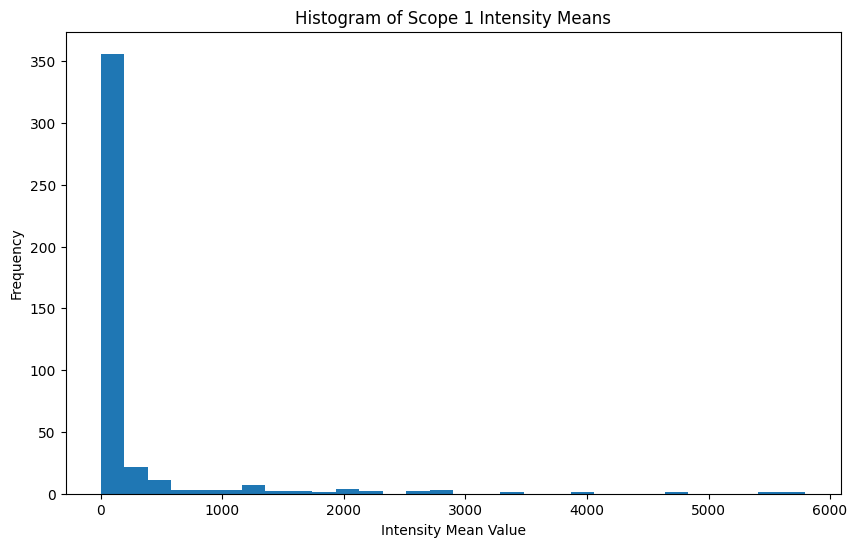

In [308]:
# Draw the histogram
plt.figure(figsize=(10, 6))
Scope1Intensity.mean().hist(bins=30)
plt.title('Histogram of Scope 1 Intensity Means')
plt.xlabel('Intensity Mean Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [309]:
def analyze_distribution(values,  title):
    # whole range
    overall_range = (np.min(values), np.max(values))

    # most common range
    count_bin_edges = np.histogram_bin_edges(values, bins=30)
    most_common_bin_index = np.argmax(np.histogram(values, bins=count_bin_edges)[0])
    most_common_range = (count_bin_edges[most_common_bin_index], count_bin_edges[most_common_bin_index + 1])

    # max and min value
    max_index = np.argmax(values)
    min_index = np.argmin(values)
    max_value = values[max_index]
    min_value = values[min_index]


    # print
    print(f"{title}:")
    print(f"Overall range: {overall_range[0]:.4f} to {overall_range[1]:.4f}")
    print(f"Most common range: {most_common_range[0]:.4f} to {most_common_range[1]:.4f}")

In [310]:
analyze_distribution(Scope1Intensity.mean(),  'Scope 1 Intensity')

Scope 1 Intensity:
Overall range: 0.0897 to 5797.2970
Most common range: 0.0897 to 193.3299


##Scope 2 Intensity

In [311]:
Scope2Intensity.mean().describe()

count    426.000000
mean      49.709614
std       77.294380
min        0.316764
25%       12.294478
50%       26.396165
75%       54.706713
max      776.500509
dtype: float64

In [312]:
print(f'On the cross-sectional distribution of firm’s scope 2 carbon intensity:\n (tons of CO2 equivalent per million U.S. dollars of revenue) \n mean is {Scope2Intensity.mean().mean()}, \n median is {Scope2Intensity.mean().median()}, \n min is {Scope2Intensity.mean().min()} from company {Scope2Intensity.mean().idxmin()},\n max is {Scope2Intensity.mean().max()} from company {Scope2Intensity.mean().idxmax()}, \n standard deviation is {Scope2Intensity.mean().std()} ')

On the cross-sectional distribution of firm’s scope 2 carbon intensity:
 (tons of CO2 equivalent per million U.S. dollars of revenue) 
 mean is 49.70961435574784, 
 median is 26.396164620665743, 
 min is 0.3167635303931551 from company Hokkaido Electric Power Company, Incorporated,
 max is 776.5005085190647 from company Toyobo Co., Ltd., 
 standard deviation is 77.29437994443315 


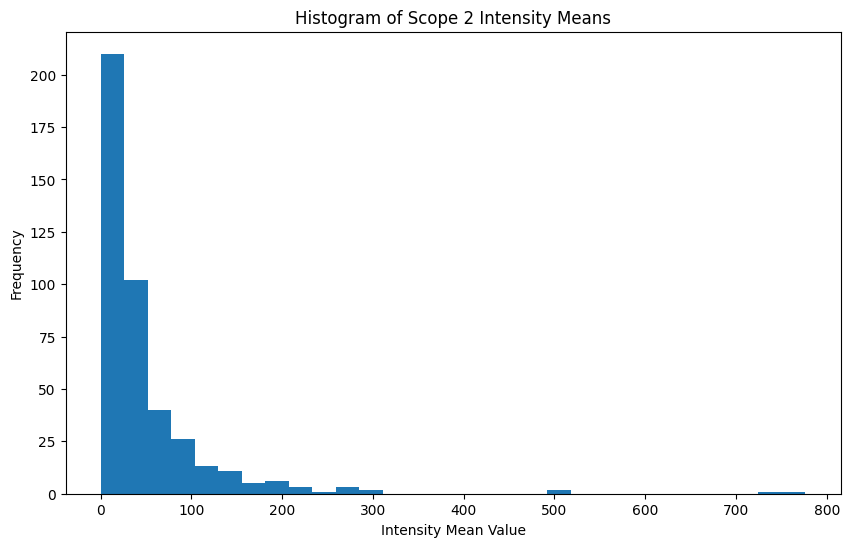

In [313]:
# Draw the histogram
plt.figure(figsize=(10, 6))
Scope2Intensity.mean().hist(bins=30)
plt.title('Histogram of Scope 2 Intensity Means')
plt.xlabel('Intensity Mean Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [314]:
analyze_distribution(Scope2Intensity.mean(),  'Scope 2 Intensity')

Scope 2 Intensity:
Overall range: 0.3168 to 776.5005
Most common range: 0.3168 to 26.1896


##Scope 3 Intensity

In [315]:
Scope3Intensity.mean().describe()

count     426.000000
mean      203.294475
std       176.348426
min        23.212812
25%        71.865890
50%       171.426058
75%       290.529714
max      1640.508791
dtype: float64

In [316]:
print(f'On the cross-sectional distribution of firm’s scope 3 carbon intensity:\n (tons of CO2 equivalent per million U.S. dollars of revenue) \n mean is {Scope3Intensity.mean().mean()}, \n median is {Scope3Intensity.mean().median()}, \n min is {Scope3Intensity.mean().min()} from company {Scope3Intensity.mean().idxmin()},\n max is {Scope3Intensity.mean().max()} from company {Scope3Intensity.mean().idxmax()}, \n standard deviation is {Scope3Intensity.mean().std()} ')

On the cross-sectional distribution of firm’s scope 3 carbon intensity:
 (tons of CO2 equivalent per million U.S. dollars of revenue) 
 mean is 203.29447498605472, 
 median is 171.4260580629756, 
 min is 23.21281167859722 from company Resona Holdings, Inc.,
 max is 1640.5087907013387 from company NH Foods Ltd., 
 standard deviation is 176.34842603010983 


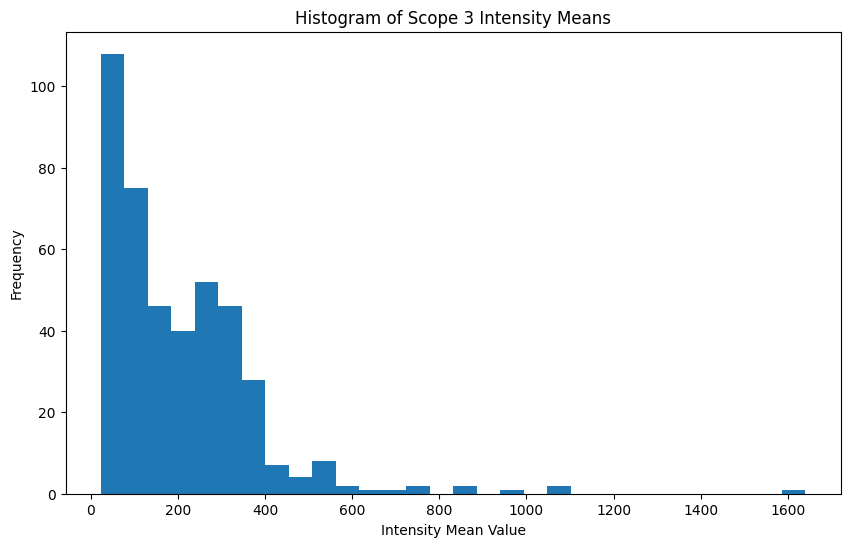

In [317]:
# Draw the histogram
plt.figure(figsize=(10, 6))
Scope3Intensity.mean().hist(bins=30)
plt.title('Histogram of Scope 3 Intensity Means')
plt.xlabel('Intensity Mean Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [318]:
analyze_distribution(Scope3Intensity.mean(),  'Scope 3 Intensity')

Scope 3 Intensity:
Overall range: 23.2128 to 1640.5088
Most common range: 23.2128 to 77.1227


##Scope 1-3

In [319]:
scope123Intensity = Scope1Intensity + Scope2Intensity + Scope3Intensity
scope123Intensity

,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,4890.224116,154.036166,53.295713,200.992199,48.454590,40.745375,28.056843,1502.907980,28.056843,546.410904,...,32.966453,412.799017,195.731863,586.118877,73.325418,308.005758,1669.304169,186.105932,154.036166,119.971273
2008,5557.883333,150.382172,67.982964,185.550729,45.095806,37.931734,25.763655,1171.655622,25.763655,371.056683,...,29.450758,357.372830,199.931531,561.369411,68.064176,343.443938,1371.217435,177.957082,150.382172,109.796645
2009,4342.433648,148.282795,70.359523,193.484982,41.748819,46.592007,27.008897,1260.144600,27.008897,526.002025,...,33.390528,322.953366,221.342701,599.518035,70.070890,342.619225,1531.750400,182.182061,148.282795,116.262317
2010,4027.869296,151.549638,43.841423,185.437669,38.466951,42.214614,26.170031,835.604043,26.170031,449.344901,...,32.605242,291.059350,227.125924,587.711283,88.272060,342.091098,1573.212208,166.274398,151.549638,117.129627
2011,3447.400271,139.265908,42.523536,311.192296,37.789683,38.254983,25.134948,824.069890,25.245816,358.811237,...,30.298616,268.933064,228.776498,523.672365,61.495669,348.426795,1364.286441,148.320222,166.968313,112.133873
2012,3315.112712,136.835243,39.811919,287.219926,35.979712,42.568860,48.468844,792.790491,24.394203,423.119059,...,29.667322,242.846025,199.448689,593.112339,81.032318,288.935751,1308.871412,139.173937,161.857537,110.095313
2013,3304.745215,134.782714,31.454285,282.911624,36.767606,41.418495,44.978563,963.873024,24.018475,229.796341,...,27.120443,240.870471,183.989589,549.528843,82.462381,282.449802,1310.792697,133.402835,159.429648,113.065339
2014,3102.600518,144.790681,32.730536,298.285959,38.591460,45.421918,45.995903,899.329396,25.074276,164.266394,...,28.768840,242.313435,202.990171,771.469393,87.940581,285.032034,1298.202686,142.028725,160.851728,107.399836
2015,3404.057835,135.862951,31.845073,295.473887,38.709409,46.347528,44.580688,1071.786300,24.622290,183.561005,...,27.746534,244.921387,194.178709,840.210366,88.577083,634.302338,1275.355114,135.415734,161.739727,119.038792
2016,3268.998859,139.421604,32.697000,306.304965,33.860000,51.485000,52.031859,835.806399,25.773709,209.724324,...,28.516019,260.551824,1565.272000,970.717613,96.676923,423.084233,1435.897000,121.681557,168.327000,125.369155


In [320]:
scope123Intensity.mean().describe()

count     426.000000
mean      479.010011
std       751.006946
min        25.636491
25%       123.095478
50%       256.271409
75%       438.744814
max      6451.312766
dtype: float64

In [321]:
print(f'On the cross-sectional distribution of firm’s scope 1+2+3 carbon intensity:\n (tons of CO2 equivalent per million U.S. dollars of revenue) \n mean is {scope123Intensity.mean().mean()}, \n median is {scope123Intensity.mean().median()}, \n min is {scope123Intensity.mean().min()} from company {scope123Intensity.mean().idxmin()},\n max is {scope123Intensity.mean().max()} from company {scope123Intensity.mean().idxmax()}, \n standard deviation is {scope123Intensity.mean().std()} ')

On the cross-sectional distribution of firm’s scope 1+2+3 carbon intensity:
 (tons of CO2 equivalent per million U.S. dollars of revenue) 
 mean is 479.0100107244903, 
 median is 256.2714087750828, 
 min is 25.63649122370958 from company Hokuhoku Financial Group, Inc.,
 max is 6451.312766014845 from company Sumitomo Osaka Cement Co., Ltd., 
 standard deviation is 751.0069462522815 


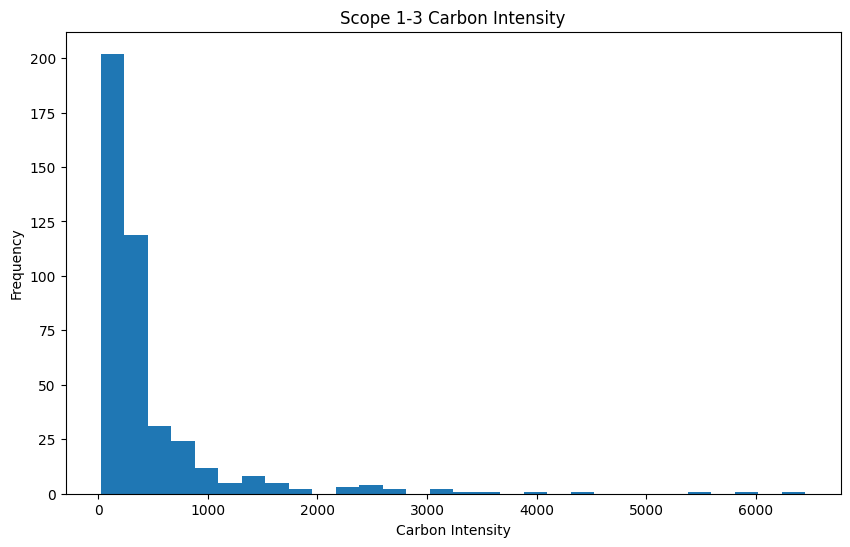

In [322]:
# Draw the histogram
plt.figure(figsize=(10, 6))
scope123Intensity.mean().hist(bins=30)
plt.title('Scope 1-3 Carbon Intensity')
plt.xlabel('Carbon Intensity')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [323]:
analyze_distribution(scope123Intensity.mean(),  'Scope 1-3 Intensity')

Scope 1-3 Intensity:
Overall range: 25.6365 to 6451.3128
Most common range: 25.6365 to 239.8257


#Question 2

In [324]:
#Step 1: average CI in the given period
scope123Intensity.mean()

ADBRI Limited                 3584.898241
Aristocrat Leisure Limited     126.413158
AMP Limited                     40.057657
Ansell Limited                 263.857160
ANZ Group Holdings Limited      37.733002
                                 ...     
Keppel Corporation Limited     340.833729
Singapore Airlines Limited    1442.638771
OUE Limited                    155.422661
Flex Ltd.                      161.511384
Genting Singapore Limited      119.822892
Length: 426, dtype: float64

##Carbon Intensity

In [325]:
#Step 2: target portfolio's weight * CI
target_portfolio_WACI = []

for weights in target_weights:
    portfolio_WACI = scope123Intensity.mean().dot(weights)
    target_portfolio_WACI.append(portfolio_WACI)

target_portfolio_WACI = pd.DataFrame(target_portfolio_WACI).T

# rename
target_portfolio_WACI.columns = [f"Portfolio {i+1}" for i in range(len(target_weights))]

print(target_portfolio_WACI)

   Portfolio 1  Portfolio 2  Portfolio 3  Portfolio 4  Portfolio 5  \
0  2085.931805  2058.250671  2101.878269  2147.984799  1920.809688   

   Portfolio 6  Portfolio 7  Portfolio 8  Portfolio 9  Portfolio 10  
0  1523.342276   970.903444   372.932056     191.7128    164.660246  


In [326]:
#Step 3: find the top 10 contributors in each firm
for i, weights in enumerate(target_weights):
    # calculate the weighted intensity
    weighted_intensities = scope123Intensity.mean() * weights
    # rank and find the top10
    top_10 = weighted_intensities.sort_values(ascending=False).head(10)

    # use df_Static_Carbon_PAC to get ISIN and GICSSectorName
    top_10_details = df_Static_Carbon.set_index('Company').loc[top_10.index][['ISIN', 'GICSSectorName']]

    # add the carbon intensity top_10_details
    top_10_details['Carbon Intensity'] = top_10

    # rename
    top_10_details.rename(columns={'ISIN': 'ISIN', 'GICSSectorName': 'GICSSectorName'}, inplace=True)

    # print
    print(f"Portfolio {i+1}:")
    print(top_10_details.sort_values(by='Carbon Intensity', ascending=False))
    print("\n")

Portfolio 1:
                                                         ISIN  \
CLP Holdings Limited                             HK0002007356   
Power Assets Holdings Limited                    HK0006000050   
Sumitomo Osaka Cement Co., Ltd.                  JP3400900001   
The Chugoku Electric Power Co., Inc.             JP3522200009   
Guangdong Investment Limited                     HK0270001396   
Toyo Suisan Kaisha, Ltd.                         JP3613000003   
The Kansai Electric Power Company, Incorporated  JP3228600007   
Tokyo Gas Co.,Ltd.                               JP3573000001   
Beijing Enterprises Holdings Limited             HK0392044647   
ANA Holdings Inc.                                JP3429800000   

                                                   GICSSectorName  \
CLP Holdings Limited                                    Utilities   
Power Assets Holdings Limited                           Utilities   
Sumitomo Osaka Cement Co., Ltd.                         Material

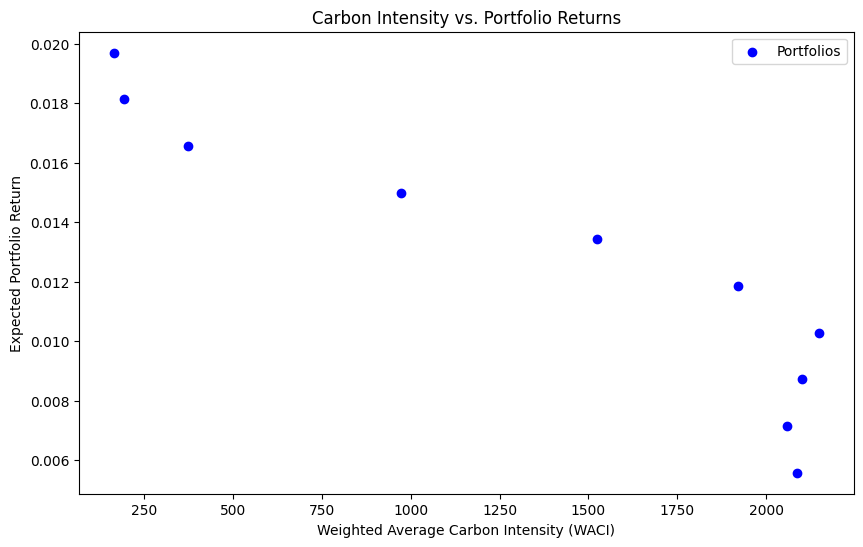

In [327]:
plt.figure(figsize=(10, 6))
plt.scatter(target_portfolio_WACI, target_returns, c='blue', label='Portfolios')


plt.title('Carbon Intensity vs. Portfolio Returns')
plt.xlabel('Weighted Average Carbon Intensity (WACI)')
plt.ylabel('Expected Portfolio Return')

plt.legend()
plt.grid(False)

plt.show()

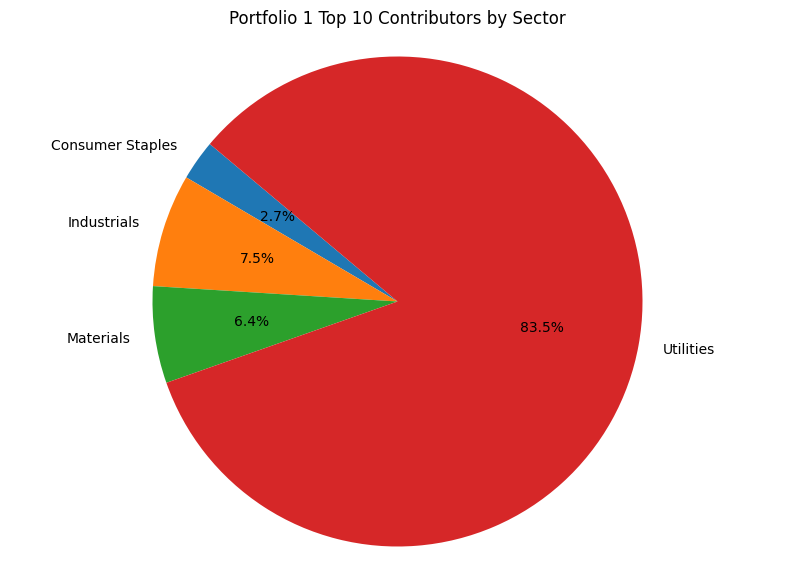

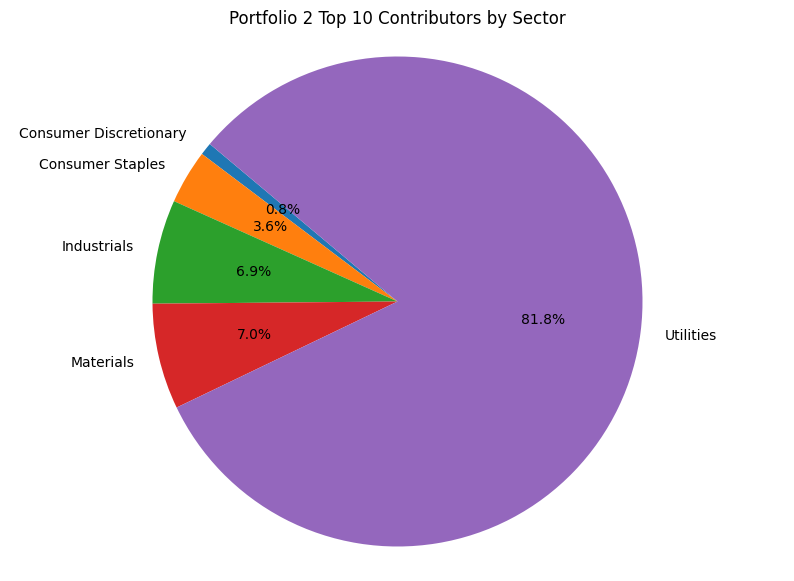

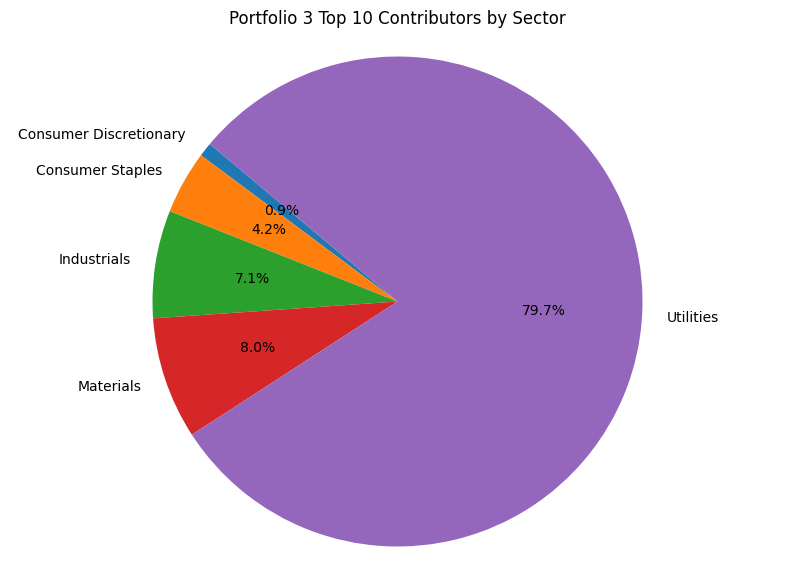

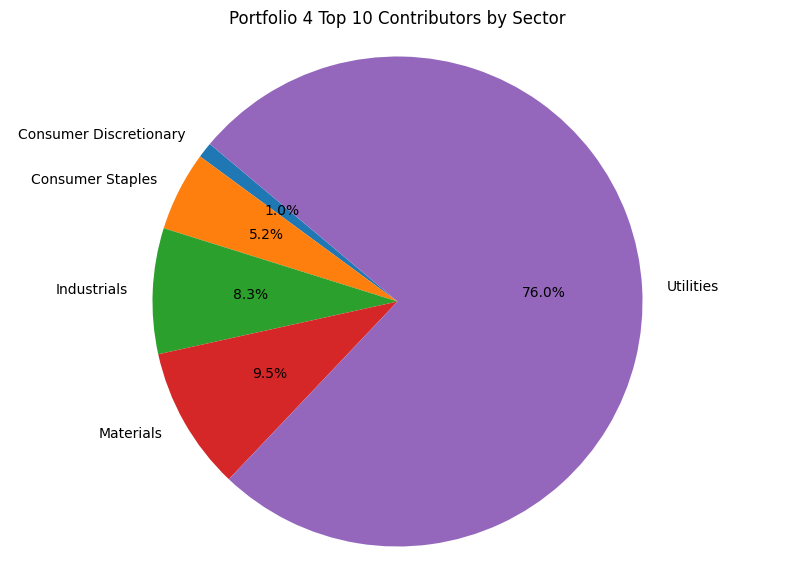

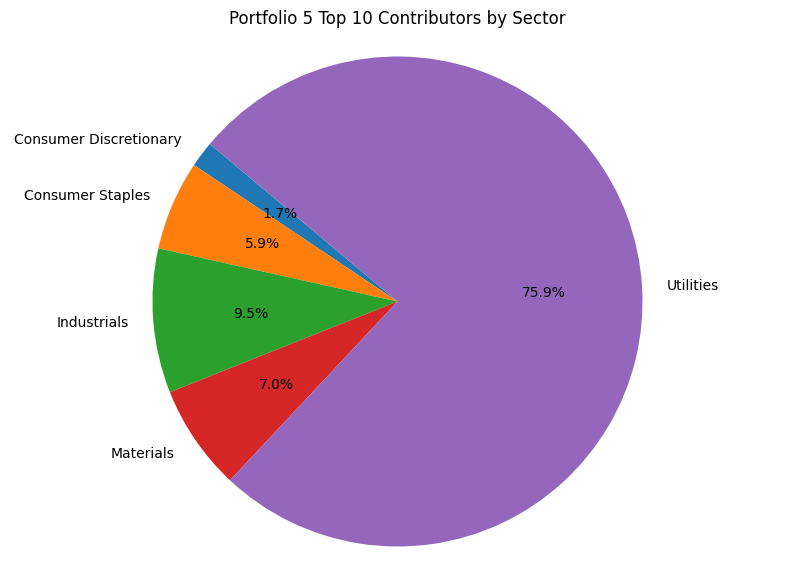

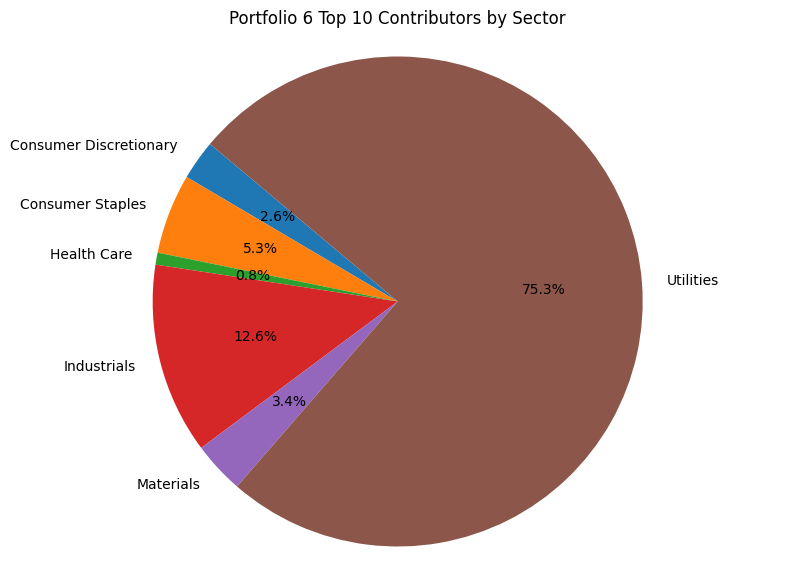

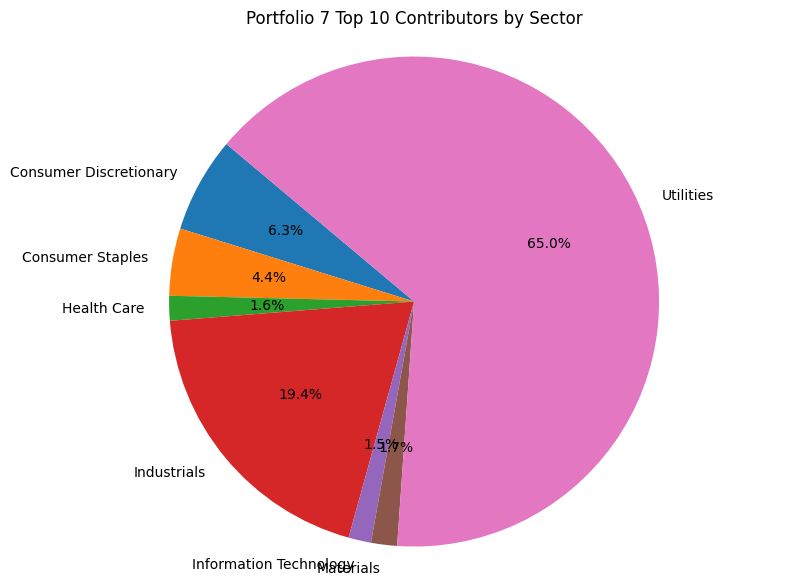

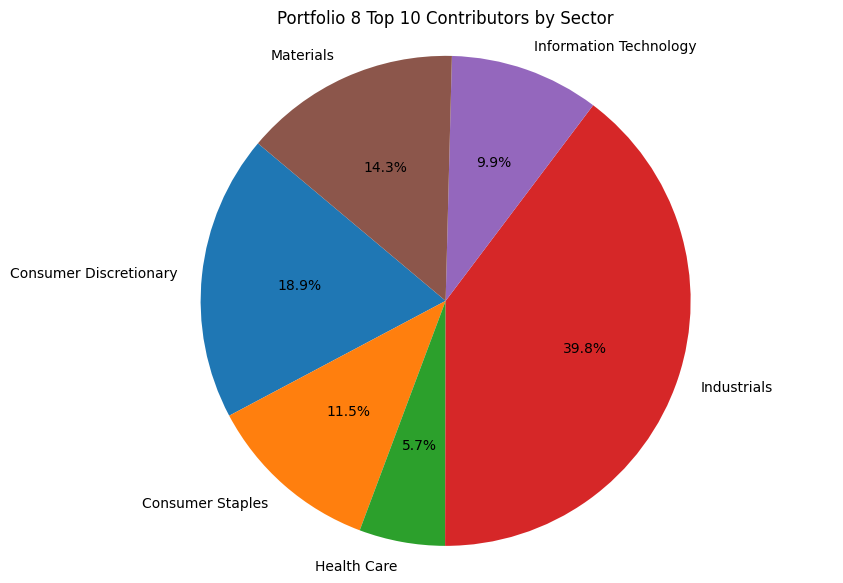

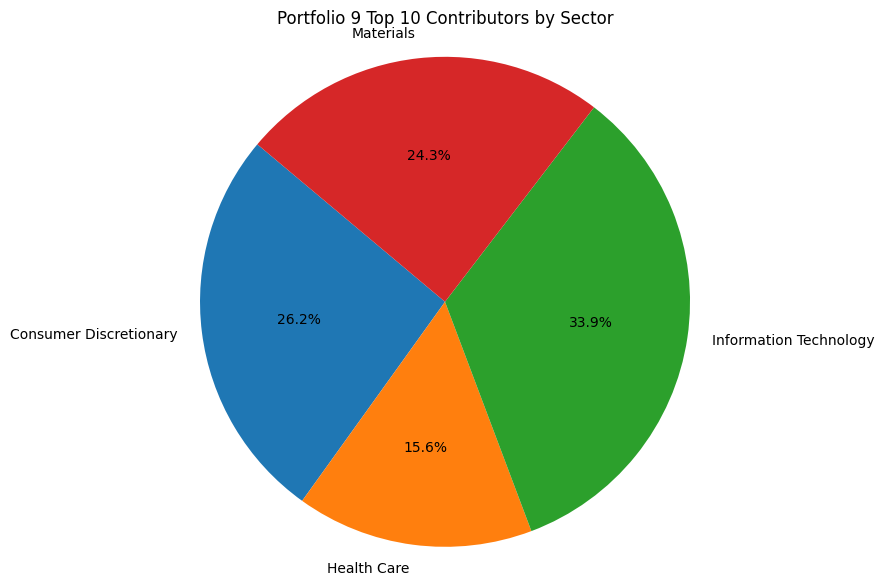

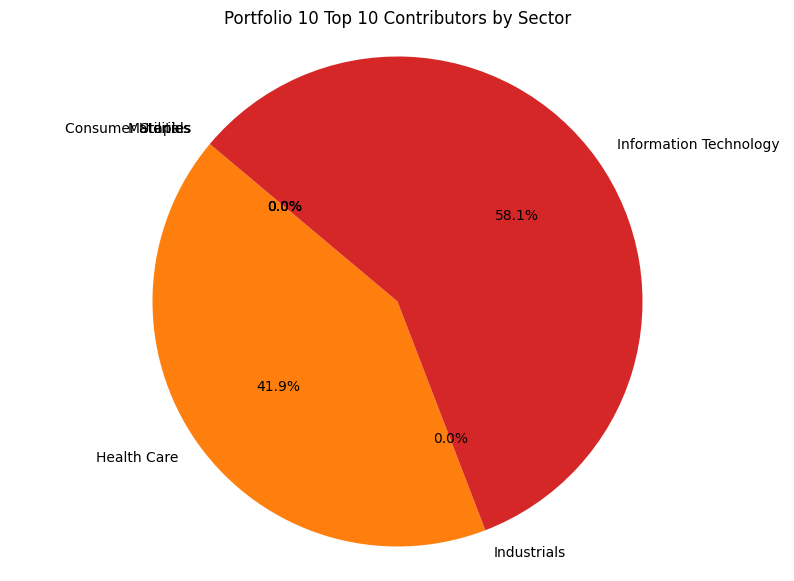

In [328]:
for i, weights in enumerate(target_weights):
    # Calculate the weighted intensities
    weighted_intensities = scope123Intensity.mean() * weights
    # Rank and find the top 10
    top_10 = weighted_intensities.sort_values(ascending=False).head(10)

    # Use df_Static_Carbon to get ISIN and GICSSectorName for the top 10
    top_10_details = df_Static_Carbon.set_index('Company').loc[top_10.index][['ISIN', 'GICSSectorName']]
    top_10_details['Carbon Intensity'] = top_10

    # Group by sector and sum up the carbon intensities
    sector_intensities = top_10_details.groupby('GICSSectorName')['Carbon Intensity'].sum()

    # Plot the pie chart
    plt.figure(figsize=(10, 7))
    plt.pie(sector_intensities, labels=sector_intensities.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Portfolio {i+1} Top 10 Contributors by Sector')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

##Carbon footprint

In [329]:
MV_Y = MV_Y.astype(float)
MV_Y.columns = Scope123.columns
MV_Y.index = Scope123.index

In [330]:
a = Scope123/MV_Y

In [331]:
target_portfolio_CF = []

for weights in target_weights:
    portfolio_CF = a.mean().dot(weights)
    target_portfolio_CF.append(portfolio_CF)

target_portfolio_CF = pd.DataFrame(target_portfolio_CF).T

# rename
target_portfolio_CF.columns = [f"Portfolio {i+1}" for i in range(len(target_weights))]

print(target_portfolio_CF)

   Portfolio 1  Portfolio 2  Portfolio 3  Portfolio 4  Portfolio 5  \
0  1312.667646  1224.983839   1218.83334  1195.981488     958.5811   

   Portfolio 6  Portfolio 7  Portfolio 8  Portfolio 9  Portfolio 10  
0   684.532372   421.979734   185.173752    91.898758     72.619585  


#Question 3

## WACI

In [332]:
# Obtain Yearly Carbon Intensity
CI = Scope2Intensity + Scope2Intensity + Scope3Intensity
CI.head()


,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,1054.808639,135.523272,46.586070,193.577950,67.175769,47.851258,27.855514,1675.790488,27.855514,220.061237,...,35.262092,256.010771,226.098964,571.071975,80.103503,229.688783,146.091558,242.593650,135.523272,149.312637
2008,990.867208,126.936679,61.197211,178.061217,61.256106,44.810192,25.571633,1169.109016,25.571633,201.014493,...,31.241274,237.270465,221.961026,545.857148,74.268100,212.356683,120.312924,234.092366,126.936679,138.263488
2009,1037.755039,130.461371,64.734347,186.347661,55.753918,61.966571,26.815089,1407.790248,26.815089,211.841776,...,36.652555,251.536696,235.013376,584.448975,76.285038,221.888693,148.973631,237.280045,130.461371,144.365643
2010,1013.810462,127.550288,45.420785,177.521056,50.295458,54.112481,25.969012,685.313710,25.969012,203.584658,...,35.896255,238.138840,233.701499,574.202082,122.434863,197.935130,127.971113,217.076314,127.550288,145.934131
2011,915.146031,122.627094,44.156723,307.657310,48.532508,47.367249,24.953594,840.796647,25.138879,195.939355,...,32.892235,244.488087,229.919862,513.794368,71.099230,196.666818,120.996095,195.085293,211.564419,139.564931


In [333]:
# Obtain the yearly relative market cap
total_market_cap = MV_Y.sum(axis=1)
weights_MV = MV_Y.div(total_market_cap, axis=0)
for column in weights_MV.columns:
    weights_MV[column] = pd.to_numeric(weights_MV[column], errors='coerce')
weights_MV.index = weights_MV.index.astype(int)
weights_MV.head()

,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,0.000355,0.000981,0.003505,0.000314,0.009904,0.001944,0.000714,0.025309,0.000484,0.000251,...,0.003853,0.001922,0.000535,0.001216,0.009465,0.003063,0.003064,0.000438,0.002147,0.000981
2008,0.000270,0.000410,0.002509,0.000396,0.007666,0.001324,0.000745,0.023732,0.000365,0.000231,...,0.003608,0.000492,0.000409,0.000948,0.009392,0.001595,0.003090,0.000554,0.000691,0.001003
2009,0.000420,0.000516,0.003340,0.000351,0.013958,0.001450,0.000830,0.034855,0.000592,0.000239,...,0.005633,0.000508,0.000608,0.001116,0.009451,0.002503,0.003379,0.000341,0.001590,0.002898
2010,0.000509,0.000388,0.002690,0.000410,0.014718,0.001602,0.000864,0.036874,0.000560,0.000231,...,0.006104,0.000886,0.000683,0.001665,0.008987,0.003361,0.003385,0.000597,0.001425,0.004933
2011,0.000519,0.000337,0.003279,0.000536,0.015520,0.001511,0.000869,0.031197,0.000474,0.000388,...,0.005720,0.000416,0.000652,0.001863,0.010458,0.003525,0.002588,0.000438,0.001111,0.003909


In [334]:
# Obtain the WACI
WACI = []
for year in weights_MV.index:
    if year in CI.index:
        current_weights = weights_MV.loc[year].values
        current_CI = CI.loc[year]

        current_WACI = np.dot(current_CI, current_weights)

        WACI.append(current_WACI)
    else:
        WACI.append(np.nan)
WACI_df = pd.DataFrame(WACI, index=weights_MV.index, columns=['WACI'])
print(WACI_df)

            WACI
2007  302.502727
2008  258.479857
2009  309.308436
2010  262.281979
2011  257.937849
2012  238.991493
2013  260.261241
2014  235.173049
2015  235.634448
2016  259.962020
2017  276.107161
2018  256.494574
2019  238.575380
2020  248.958382
2021  249.882406


## Covariance Matrix

In [335]:
 # Monthly return rate and volitality
 # Monthly return rate and volitality
## transpose
df_RI = df_return_PAC.set_index('NAME').T
df_RI = df_return_PAC.set_index('NAME').T[1:]
df_RI.reset_index(inplace=True)
df_RI.rename(columns={'index': 'Date'}, inplace=True)
df_RI['Date'] = pd.to_datetime(df_RI['Date']).dt.date
df_RI.set_index('Date', inplace=True)
df_RI
df_returnRate_full = df_RI.iloc[1:] / df_RI.shift(1).iloc[1:] - 1
display(df_returnRate_full)

# Step 1: Select data between 2000-02-29 and 2007-12-31
df_returnRate_full.index = pd.to_datetime(df_returnRate_full.index)
df_selected = df_returnRate_full[(df_returnRate_full.index.year >= 2000) & (df_returnRate_full.index.year <= 2007)]


# Step 2: Calculate expected return and covariance matrix
# Expected rate of return - the average rate of return for each asset
expected_returns = df_selected.mean()
expected_returns = pd.DataFrame(expected_returns, columns=['Exp Return'])


# covariance matrix for 2007-12-31
df_selected_numeric = df_selected.apply(pd.to_numeric, errors='coerce')
covariance_matrix = df_selected_numeric.cov()


# Output the calculation results for verification
print("Expected Returns:\n", expected_returns.head()) # Display the first few lines as an example
print("\nCovariance Matrix:\n", covariance_matrix.head()) # Display the first few rows of the covariance matrix as an example

cov_matrix_df = pd.DataFrame(covariance_matrix, index=df_returnRate_full.columns, columns=df_returnRate_full.columns)
#Create a MultiIndex containing dates
multi_index = pd.MultiIndex.from_product([[pd.Timestamp('2007-12-31 00:00:00')], cov_matrix_df.columns], names=['Date', 'Asset'])

#Create a new DataFrame using the multi-level index created above
cov_matrix_with_date = pd.DataFrame(cov_matrix_df.values, index=multi_index, columns=cov_matrix_df.columns)

# Display new DataFrame
cov_matrix_with_date

df_filtered = df_returnRate_full.loc['2001-01-31':'2020-12-31']
df_filtered

window = 96 # Number of months in 8 years

# Calculate rolling covariance matrix from 2018-12-31 to 2020-12-31
Covar=df_filtered.rolling(window).cov().dropna()
Covar


NAME,ADBRI,ARISTOCRAT LEISURE,AMP,ANSELL,ANZ GROUP HOLDINGS,ASX,BENDIGO & ADELAIDE BANK,BHP GROUP,BANK OF QLND.,BEACH ENERGY,...,OVERSEA-CHINESE BKG.,COSCO SHIPPING INTERNATIONAL,UOL GROUP,FRASER AND NEAVE,SINGAPORE TELECOM,KEPPEL,SINGAPORE AIRLINES,OUE,FLEX,GENTING SINGAPORE
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-29,-0.31615,-0.285561,-0.060953,-0.203724,-0.082271,0.151619,0.054009,-0.171358,0.001935,-0.146528,...,-0.258471,-0.032032,-0.115837,-0.104314,-0.020737,-0.028597,-0.113343,-0.128048,0.225153,0.060935
2000-03-31,-0.011631,-0.148047,0.042029,-0.025644,0.03171,-0.080614,-0.079966,0.098718,0.019637,0.16843,...,-0.020017,-0.016284,0.024267,0.027693,-0.121649,0.049505,0.007733,0.016941,0.157084,-0.080645
2000-04-30,-0.117176,-0.042805,-0.07136,-0.114665,0.098521,-0.11537,-0.01579,-0.004351,-0.070068,-0.230501,...,0.105719,-0.120357,0.010013,0.131723,0.009746,-0.013208,0.10822,-0.03422,-0.00266,-0.036799
2000-05-31,-0.152639,0.15433,-0.005397,0.143094,0.006894,-0.237808,-0.087727,-0.053235,-0.010221,-0.193665,...,-0.164565,-0.069522,-0.031555,-0.075076,-0.058674,-0.178967,-0.15951,-0.061409,-0.225089,-0.054198
2000-06-30,0.14684,0.323224,0.177778,-0.053672,0.114917,0.217168,0.092406,0.169781,0.083734,-0.139169,...,0.2234,0.208697,0.342416,0.199872,0.079061,0.170781,0.135131,0.042068,0.261768,-0.018318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.138019,-0.00515,0.055031,0.002305,-0.015202,-0.12677,-0.137758,0.041952,-0.076673,-0.073466,...,0.050549,-0.054036,-0.080504,-0.020677,0.013693,0.069981,-0.032404,0.036646,0.060117,-0.033612
2022-09-30,-0.215161,-0.134037,-0.11848,-0.109205,-0.058444,-0.128359,-0.167177,-0.100906,-0.126718,-0.184632,...,-0.048651,-0.105321,-0.065677,-0.070218,-0.012884,-0.070539,-0.067947,-0.070533,-0.064569,-0.015224
2022-10-31,-0.143634,0.121293,0.144548,0.117258,0.120146,-0.061706,0.150314,-0.026136,0.129931,0.065999,...,0.039704,-0.050472,-0.056148,0.009041,-0.047018,0.016905,0.045812,-0.017224,0.17527,0.039838


Expected Returns:
                    Exp Return
NAME                         
ADBRI                0.029817
ARISTOCRAT LEISURE   0.023941
AMP                  0.010874
ANSELL               0.011362
ANZ GROUP HOLDINGS   0.019815

Covariance Matrix:
 NAME                   ADBRI  ARISTOCRAT LEISURE       AMP    ANSELL  \
NAME                                                                   
ADBRI               0.012152            0.003285  0.001832  0.001251   
ARISTOCRAT LEISURE  0.003285            0.021611  0.006467  0.004106   
AMP                 0.001832            0.006467  0.009470  0.002297   
ANSELL              0.001251            0.004106  0.002297  0.006155   
ANZ GROUP HOLDINGS  0.002850            0.002281  0.002286  0.001195   

NAME                ANZ GROUP HOLDINGS       ASX  BENDIGO & ADELAIDE BANK  \
NAME                                                                        
ADBRI                         0.002850  0.003111                 0.002054   
ARISTOCRAT LEI

NAME                              ADBRI  ARISTOCRAT LEISURE       AMP  \
Date       NAME                                                         
2008-12-31 ADBRI               0.012266            0.004283  0.003584   
           ARISTOCRAT LEISURE  0.004283            0.023431  0.008162   
           AMP                 0.003584            0.008162  0.010279   
           ANSELL              0.001608            0.004589  0.002948   
           ANZ GROUP HOLDINGS  0.004180            0.003655  0.003191   
...                                 ...                 ...       ...   
2020-12-31 KEPPEL              0.003238            0.002550  0.003188   
           SINGAPORE AIRLINES  0.003233            0.002748  0.002875   
           OUE                 0.003322            0.002681  0.003202   
           FLEX                0.003324            0.003089  0.003978   
           GENTING SINGAPORE   0.003273            0.003265  0.003533   

NAME                             ANSELL  ANZ GROUP HOLDINGS       ASX  \
Date       NAME                                                         
2008-12-31 ADBRI               0.001608            0.004180  0.004788   
           ARISTOCRAT LEISURE  0.004589            0.003655  0.003451   
           AMP                 0.002948            0.003191  0.003788   
           ANSELL              0.006222            0.001524  0.002183   
           ANZ GROUP HOLDINGS  0.001524            0.005156  0.003708   
...                                 ...                 ...       ...   
2020-12-31 KEPPEL              0.001809            0.002934  0.001492   
           SINGAPORE AIRLINES  0.000739            0.002920  0.001231   
           OUE                 0.002425            0.003017  0.001550   
           FLEX                0.003034            0.003454  0.001853   
           GENTING SINGAPORE   0.001838            0.003200  0.002123   

NAME                           BENDIGO & ADELAIDE BANK  BHP GROUP  \
Date       NAME                                                     
2008-12-31 ADBRI                              0.002593   0.004685   
           ARISTOCRAT LEISURE                 0.001918   0.002819   
           AMP                                0.001881   0.004464   
           ANSELL                             0.001549   0.003031   
           ANZ GROUP HOLDINGS                 0.002784   0.002824   
...                                                ...        ...   
2020-12-31 KEPPEL                             0.003072   0.003406   
           SINGAPORE AIRLINES                 0.003019   0.002392   
           OUE                                0.002668   0.002900   
           FLEX                               0.003095   0.002607   
           GENTING SINGAPORE                  0.004249   0.004368   

NAME                           BANK OF QLND.  BEACH ENERGY  ...  \
Date       NAME                                             ...   
2008-12-31 ADBRI                    0.003887      0.006296  ...   
           ARISTOCRAT LEISURE       0.001224      0.003905  ...   
           AMP                      0.002539      0.003556  ...   
           ANSELL                   0.002203      0.002388  ...   
           ANZ GROUP HOLDINGS       0.003673      0.003874  ...   
...                                      ...           ...  ...   
2020-12-31 KEPPEL                   0.003127      0.007204  ...   
           SINGAPORE AIRLINES       0.002891      0.005227  ...   
           OUE                      0.003241      0.005616  ...   
           FLEX                     0.003943      0.005953  ...   
           GENTING SINGAPORE        0.004119      0.008748  ...   

NAME                           OVERSEA-CHINESE BKG.  \
Date       NAME                                       
2008-12-31 ADBRI                           0.003047   
           ARISTOCRAT LEISURE              0.003555   
           AMP                             0.002970   
           ANSELL                          0.001904   


## Optimalization the yearly weight

### 1. hw1

In [336]:
# Define optimization objective function: minimize portfolio variance
def portfolio_variance(weights, covariance_matrix):
     return weights.T @covariance_matrix @weights

# Constraint: The sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Function to calculate the optimal weight configuration for each year
def calculate_optimal_weights(covariance_matrix):
     num_assets = covariance_matrix.shape[0] # Use shape[0] to ensure correct acquisition of asset quantities in the case of a two-dimensional covariance matrix
     initial_weights = np.ones(num_assets) / num_assets #Initial weights
     bounds = tuple((0, 1) for asset in range(num_assets)) # Bounds of weight

     result = minimize(portfolio_variance, initial_weights, args=(covariance_matrix,),
                       method='SLSQP', bounds=bounds, constraints=constraints)

     if result.success:
         return result.x
     else:
         raise ValueError("Optimization failed.")

# Dictionary that stores the optimal weights for each year
optimal_weights_annual = {}

# Calculate the optimal weight configuration on December 31, 2007
cov_matrix_2007 = cov_matrix_with_date.values # Assume this is the covariance matrix of December 31, 2007
optimal_weights_annual['2007-12-31'] = calculate_optimal_weights(cov_matrix_2007)

# Calculate the optimal weight configuration from 2008 to 2020

# Traverse Covar and select the data on December 31 of each year for optimization
for date, cov_matrix in Covar.groupby(level='Date'):
     if date.month == 12 and date.day == 31:
         # Calculate the optimal weight only when the date is December 31st
         optimal_weights_annual[date.strftime('%Y-%m-%d')] = calculate_optimal_weights(cov_matrix.values)

# Output results
for date, weights in optimal_weights_annual.items():
     print(f"Optimal weights for {date}: {weights}")

Optimal weights for 2007-12-31: [0.00000000e+00 2.00636051e-18 1.48274584e-18 3.79943577e-18
 0.00000000e+00 0.00000000e+00 5.90131354e-04 5.67896904e-19
 0.00000000e+00 0.00000000e+00 3.05994708e-02 5.21390875e-19
 6.12444653e-19 6.39754935e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.30364472e-18 2.77169141e-18
 0.00000000e+00 5.72440783e-19 1.25315232e-18 0.00000000e+00
 1.55583280e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.90609667e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.90670510e-18 0.00000000e+00 5.80209651e-19 1.07886301e-18
 0.00000000e+00 1.82643387e-18 0.00000000e+00 0.00000000e+00
 1.82343445e-18 0.00000000e+00 8.31510171e-19 1.31327338e-18
 0.00000000e+00 5.09550311e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.24965492e-18 7.19200890e-19 0.00000000e+00
 6.55246016e-19 2.60181182e-02 0.00000000e+00 0.00000000e+00
 2.21385979e-18 0.00000000e+00 2.08945808e-18 0.00000

### decarbonization

In [337]:
import cvxpy as cp
import pandas as pd
import numpy as np

# - cov_matrix_2007: contains cov matrix 2007-12-31
# - Covar: df, contains cov matrices from 2008-12-31 to 2020-12-31

# Initialize an empty DataFrame
new_weights_df = pd.DataFrame(index=weights_MV.index, columns=weights_MV.columns)

for year in weights_MV.index:
    initial_weights = weights_MV.loc[year].values
    CI_year = CI.loc[year].values
    target_WACI_year = WACI_df.loc[year]

    # for 2007
    if year == 2007:
        cov_matrix = cov_matrix_2007
    else:
        # from 2008 to 2020
        date_str = f"{year}-12-31"
        if isinstance(Covar, dict):
            cov_matrix = Covar.get(date_str, np.eye(len(initial_weights)))
        else:
            cov_matrix = Covar.loc[date_str].values if date_str in Covar.index else np.eye(len(initial_weights))

    # define optimization variable
    new_weights = cp.Variable(len(initial_weights))

    # define objective fun
    objective = cp.Minimize(cp.quad_form(new_weights - initial_weights, cov_matrix))

    # define constraints
    constraints = [
        cp.sum(new_weights) == 1,
        new_weights >= 0,
        cp.matmul(CI_year, new_weights) <= target_WACI_year
    ]

    # slove
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # store new weights
    if prob.status in ["optimal", "optimal_inaccurate"]:
        new_weights_df.loc[year] = new_weights.value
    else:
        print(f"Optimization for year {year} failed with status: {prob.status}")

print(new_weights_df)


     ADBRI Limited Aristocrat Leisure Limited AMP Limited Ansell Limited  \
2007      0.000037                    0.00011    0.001296       0.000302   
2008      0.000181                   0.001674    0.003189       0.000274   
2009      0.000097                   0.000521    0.009815       0.000615   
2010      0.000061                   0.002162    0.008654       0.001696   
2011      0.000092                   0.000928    0.000206       0.000068   
2012      0.000027                   0.001427    0.001398       0.000129   
2013      0.000065                   0.000887    0.001932       0.000273   
2014      0.000011                   0.000599    0.001654       0.000034   
2015      0.002066                   0.002329    0.000892      -0.000021   
2016      0.001594                   0.000665    0.002056       0.000705   
2017      0.000117                   0.006155    0.003687       0.001357   
2018      0.000001                   0.000439    0.000491       0.000309   
2019      0.

In [338]:
new_weights_df = new_weights_df.loc['2007':'2020']
new_weights_df

,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,0.000037,0.00011,0.001296,0.000302,0.001123,0.001029,0.002089,0.000471,0.001567,0.002786,...,0.000945,0.001554,0.000781,0.000872,0.00328,0.000594,0.002364,0.001107,0.002865,0.001629
2008,0.000181,0.001674,0.003189,0.000274,0.001393,0.00235,0.002193,0.001197,0.006134,0.001898,...,0.000555,0.000253,0.002519,0.000111,0.003118,0.000652,0.000607,0.006634,0.003338,0.000138
2009,0.000097,0.000521,0.009815,0.000615,0.010063,0.00008,0.002063,0.000047,0.000491,0.000178,...,0.02399,0.000123,0.000545,0.000317,0.007049,0.000191,0.000936,0.008592,0.002701,0.002108
2010,0.000061,0.002162,0.008654,0.001696,0.012921,0.002422,0.009087,0.006459,0.002713,0.000166,...,0.01735,0.000752,0.002406,0.000037,0.005281,0.000418,0.000849,0.000895,0.007188,0.007641
2011,0.000092,0.000928,0.000206,0.000068,0.012506,0.001498,0.008313,0.002895,0.002949,0.000689,...,0.004278,0.001567,0.002928,0.000052,0.00738,0.000372,0.002422,0.000276,0.002074,0.005884
2012,0.000027,0.001427,0.001398,0.000129,0.012463,0.001054,0.002637,0.006117,0.006368,0.000597,...,0.00114,0.000443,0.000143,0.001737,0.001325,0.000791,0.000511,0.000566,0.000355,0.000249
2013,0.000065,0.000887,0.001932,0.000273,0.022348,0.002016,0.001478,0.000198,0.002515,0.00035,...,0.007612,0.001177,0.000759,0.000086,0.001975,0.00014,0.001318,0.001267,0.000443,0.00208
2014,0.000011,0.000599,0.001654,0.000034,0.000673,0.002036,0.002168,0.000035,0.004577,0.002895,...,0.011772,0.002164,0.001948,0.000034,0.020385,0.000273,0.002528,0.000424,0.000305,0.000933
2015,0.002066,0.002329,0.000892,-0.000021,0.008704,0.001517,0.003772,0.001671,0.00388,0.000869,...,0.00203,0.001385,0.000257,0.000016,0.005208,-0.000036,0.000375,0.000048,0.003093,0.005046
2016,0.001594,0.000665,0.002056,0.000705,0.015626,0.001718,0.001948,0.001394,0.00418,0.001362,...,0.000293,0.000088,0.000007,0.000047,0.023107,0.000596,0.000513,-0.000047,0.007872,0.000095


##Update the weights monthly and calculate the portfolio return

In [339]:
# Initialize the structure that stores monthly returns
portfolio_monthly_returns = pd.Series(index=df_returnRate_full.index)

for year in range(2008, 2023):
     # Build the key using the last day of the year to get the optimal weight at the end of the previous year
     key = f'{year - 1}-12-31'
     if key in optimal_weights_annual:
         current_weights = optimal_weights_annual[key]
     else:
         print(f"Warning: No optimal weights found for year ending {key}. Skipping this year.")
         continue # If no weight is found, skip this year

     for month in range(1, 13):
         current_month_date = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(1)

         if current_month_date in df_returnRate_full.index:
             monthly_returns = df_returnRate_full.loc[current_month_date]
             portfolio_return = np.dot(current_weights, monthly_returns)
             portfolio_monthly_returns[current_month_date] = portfolio_return

             # If it is not December, update the weight based on the performance of the current month
             if month != 12:
                 next_month_date = current_month_date + pd.offsets.MonthBegin(1)
                 if next_month_date in df_returnRate_full.index: # Ensure that the weight is still in the same year when updating it
                     updated_weights = current_weights * (1 + monthly_returns) / (1 + portfolio_return)
                     normalized_weights = updated_weights / np.sum(updated_weights)
                     current_weights = normalized_weights # Update weights for next month’s calculations

# Limit the range of portfolio_monthly_returns to 2008-01-31 to 2021-12-31
portfolio_monthly_returns = portfolio_monthly_returns['2008-01-31':'2021-12-31']
portfolio_monthly_returns

Date
2008-01-31   -0.019505
2008-02-29    0.015991
2008-03-31    0.028512
2008-04-30    0.018082
2008-05-31    0.030861
                ...   
2021-08-31    0.041911
2021-09-30    0.006569
2021-10-31   -0.029616
2021-11-30   -0.021656
2021-12-31    0.023066
Length: 168, dtype: float64

## New Portfolio Performance

In [340]:
# Initialize a dataframe to store returns
portfolio_decarb_monthly_returns = pd.Series(index=df_returnRate_full.index)

for year in range(2008, 2023):
    key = year - 1  # key is int

    # check if key exists in the index of new_weights_df
    if key in new_weights_df.index:
        current_weights = new_weights_df.loc[key].values  # extract weight
    else:
        print(f"Warning: No optimal weights found for year ending {key}. Skipping this year.")
        continue  # if no weight, skip this year

    for month in range(1, 13):
        # construct the dates
        current_month_date = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(1)

        # check if there is the return stored on this date
        if current_month_date in df_returnRate_full.index:
            monthly_returns = df_returnRate_full.loc[current_month_date]
            portfolio_return = np.dot(current_weights, monthly_returns)
            portfolio_decarb_monthly_returns[current_month_date] = portfolio_return

            # if not Dec, update monthly weight through performance
            if month != 12:
                next_month_date = current_month_date + pd.offsets.MonthBegin(1)
                if next_month_date in df_returnRate_full.index:  # make sure the next month is still within the year
                    updated_weights = current_weights * (1 + monthly_returns) / (1 + portfolio_return)
                    normalized_weights = updated_weights / np.sum(updated_weights)
                    current_weights = normalized_weights  # update for the next month

# restrict the time period from 2008-01-31 to 2021-12-31
portfolio_decarb_monthly_returns = portfolio_decarb_monthly_returns['2008-01-31':'2021-12-31']
portfolio_decarb_monthly_returns

Date
2008-01-31   -0.077953
2008-02-29    0.018631
2008-03-31   -0.037627
2008-04-30    0.063895
2008-05-31    0.007632
                ...   
2021-08-31    0.030744
2021-09-30    0.011038
2021-10-31   -0.013408
2021-11-30   -0.032192
2021-12-31    0.025219
Length: 168, dtype: float64

## Compare

In [341]:
# annualized avg return
annualized_avg_return_portfolio = portfolio_monthly_returns.mean() * 12
annualized_avg_return_decarb = portfolio_decarb_monthly_returns.mean() * 12
# creat a DataFrame
annualized_avg_returns_df = pd.DataFrame({
    'Annualized Average Return': [annualized_avg_return_portfolio, annualized_avg_return_decarb]},
    index=['P(gmv)', 'P(vw)(0.5)'])

print(annualized_avg_returns_df)

            Annualized Average Return
P(gmv)                       0.065638
P(vw)(0.5)                   0.055797


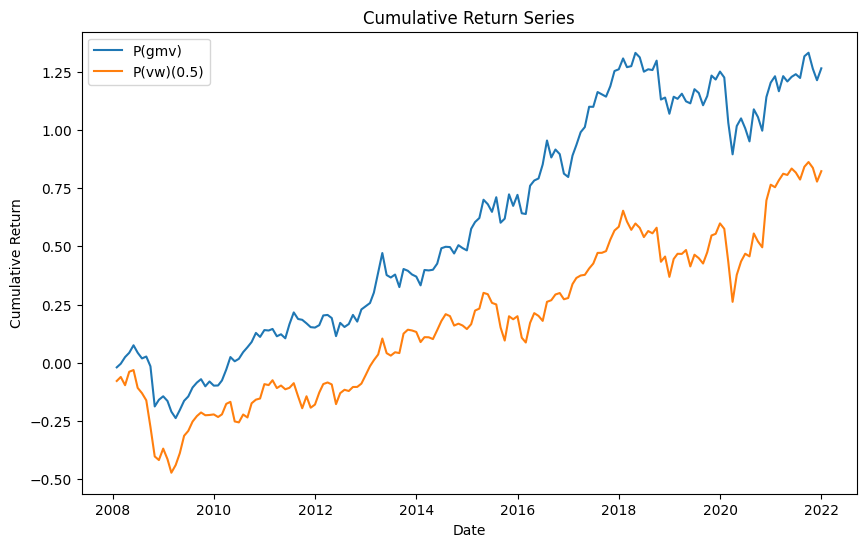

In [342]:
# cumulative returns
cumulative_return_portfolio = (1 + portfolio_monthly_returns).cumprod() - 1
cumulative_return_decarb = (1 + portfolio_decarb_monthly_returns).cumprod() - 1

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_return_portfolio, label='P(gmv)')
plt.plot(cumulative_return_decarb, label='P(vw)(0.5)')
plt.title('Cumulative Return Series')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [343]:
# Calculate the total number of years in the sample
# Assuming portfolio_monthly_returns covers a full number of years and starts in January of the first year and ends in December of the last year
T = len(portfolio_monthly_returns) / 12

# Annualize the cumulative returns
annualized_return_portfolio = (1 + cumulative_return_portfolio.iloc[-1]) ** (12 / T) - 1
annualized_return_decarb = (1 + cumulative_return_decarb.iloc[-1]) ** (12 / T) - 1

print("Annualized Return for Portfolio:", annualized_return_portfolio)
print("Annualized Return for Decarbonized Portfolio:", annualized_return_decarb)


Annualized Return for Portfolio: 1.0144341427879104
Annualized Return for Decarbonized Portfolio: 0.6727316583726697


In [344]:
df_Rf_full = pd.read_csv('https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/Rf.csv')
df_Rf_full['DATE'] = pd.to_datetime(df_Rf_full['DATE']) # Convert 'DATE' to datetime
df_Rf_full.rename(columns={'RIFLGFCM01NA': 'Annulized Rf'}, inplace=True)
df_Rf_full.set_index('DATE', inplace=True) # Set 'DATE' as the index
df_Rf = df_Rf_full[(df_Rf_full.index.year >= 2008) & (df_Rf_full.index.year <= 2021)]
annualized_rf = df_Rf['Annulized Rf'].mean()/100

def calculate_portfolio_metrics(monthly_returns):
    """calculate and return the metrics: annualized avg return, annualized volality, sharpe ratio, Min/Max rr"""
    annualized_return = monthly_returns.mean() * 12
    annualized_volatility = monthly_returns.std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - annualized_rf) / annualized_volatility
    min_return = monthly_returns.min()
    max_return = monthly_returns.max()

    return annualized_return, annualized_volatility, sharpe_ratio, min_return, max_return

# for P(gmv)
metrics_portfolio = calculate_portfolio_metrics(portfolio_monthly_returns)

# for P(vw)(0.5)
metrics_decarb = calculate_portfolio_metrics(portfolio_decarb_monthly_returns)

# create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'P(gmv)': metrics_portfolio,
    'P(vw)(0.5)': metrics_decarb
}, index=['Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Min Return', 'Max Return'])

print(metrics_df)


                         P(gmv)  P(vw)(0.5)
Annualized Return      0.065638    0.055797
Annualized Volatility  0.118629    0.159385
Sharpe Ratio           0.510070    0.317900
Min Return            -0.174954   -0.175055
Max Return             0.073928    0.134485


Portfolio P(vw)oos

In [345]:
df_DS_MV_USD_M = pd.read_excel("https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/DS_MV_USD_M.xlsx")
PAC = ('AU', 'HK', 'JP', 'NZ', 'SG')
df_MV_PAC = df_DS_MV_USD_M[df_DS_MV_USD_M['ISIN'].str.startswith(PAC)]
df_MV_PAC

# df_MV_full includes market value
df_MV_full = df_MV_PAC.set_index('NAME').T[1:]
df_MV_full.reset_index(inplace=True)
df_MV_full.rename(columns={'index': 'Date'}, inplace=True)
df_MV_full['Date'] = pd.to_datetime(df_MV_full['Date']).dt.date
df_MV_full.set_index('Date', inplace=True)
df_MV_full.index = pd.to_datetime(df_MV_full.index)
start_date = pd.Timestamp('2007-12-31')
end_date = pd.Timestamp('2021-12-31')

df_MV = df_MV_full[(df_MV_full.index >= start_date) & (df_MV_full.index <= end_date)]

df_MV

# Initial value weighted weights
initial_weights = df_MV.loc['2007-12-31'] / df_MV.loc['2007-12-31'].sum()

# Initialize the dataframe
portfolio_monthly_returns_vw = pd.Series(index=df_returnRate_full.loc['2008-01-31':'2021-12-31'].index)

initial_weights = df_MV.loc['2007-12-31'] / df_MV.loc['2007-12-31'].sum()
portfolio_monthly_returns_vw['2008-01-31'] = (df_returnRate_full.loc['2008-01-31'] * initial_weights).sum()

# calculate the following (from 2008-02 to 2021-12)
for date in df_returnRate_full.loc['2008-02-29':'2021-12-31'].index:
    prev_month_end = date - pd.offsets.MonthEnd(1)  # always MonthEnd
    if prev_month_end in df_MV.index:
        # if exists，calculate the previous month's weight
        prev_month_weights = df_MV.loc[prev_month_end] / df_MV.loc[prev_month_end].sum()
        # calculate the portfolio performance
        portfolio_monthly_returns_vw[date] = (df_returnRate_full.loc[date] * prev_month_weights).sum()
    else:
        # if doesn't, skip
        print(f"Data for {prev_month_end} not found. Skipping or handling otherwise.")

portfolio_monthly_returns_vw.dropna(inplace=True)
portfolio_monthly_returns_vw

# annualized avg return
annualized_avg_return_vw = portfolio_monthly_returns_vw.mean() * 12

# annualized volatility
annualized_volatility_vw = portfolio_monthly_returns_vw.std() * np.sqrt(12)

# sharpe ratio
annualized_rf = df_Rf_full.loc['2018-01-31':'2021-12-31', 'Annulized Rf'].mean()/100
sharpe_ratio_vw = (annualized_avg_return_vw - annualized_rf) / annualized_volatility_vw

# Max/Min
min_return_vw = portfolio_monthly_returns_vw.min()
max_return_vw = portfolio_monthly_returns_vw.max()

print(f"Annualized Average Return: {annualized_avg_return_vw}")
print(f"Annualized Volatility: {annualized_volatility_vw}")
print(f"Sharpe Ratio: {sharpe_ratio_vw}")
print(f"Minimum Return: {min_return_vw}")
print(f"Maximum Return: {max_return_vw}")

Annualized Average Return: 0.05338387219029926
Annualized Volatility: 0.1530412165089777
Sharpe Ratio: 0.29415086047092287
Minimum Return: -0.1641611374269938
Maximum Return: 0.13034174223197836


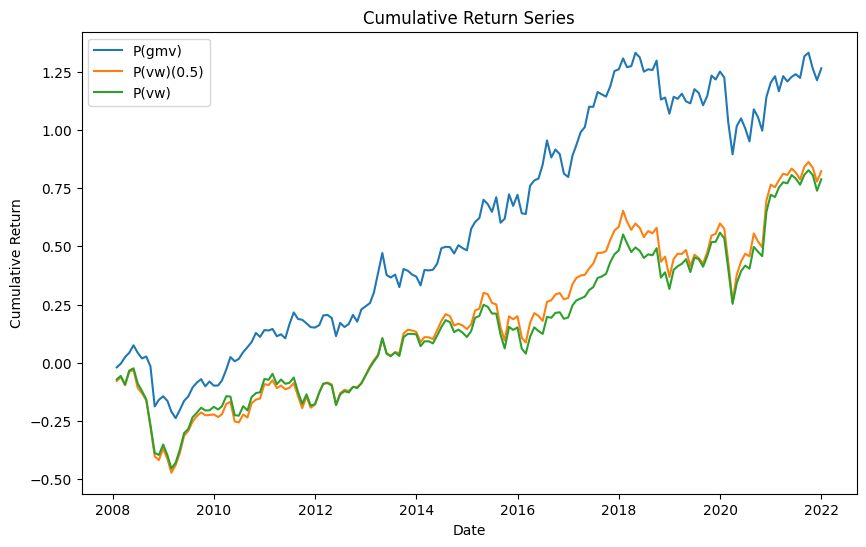

In [346]:
# cumulative returns
cumulative_return_portfolio = (1 + portfolio_monthly_returns).cumprod() - 1
cumulative_return_decarb = (1 + portfolio_decarb_monthly_returns).cumprod() - 1
cumulative_return_vw = (1 + portfolio_monthly_returns_vw).cumprod() - 1

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_return_portfolio, label='P(gmv)')
plt.plot(cumulative_return_decarb, label='P(vw)(0.5)')
plt.plot(cumulative_return_vw, label='P(vw)')
plt.title('Cumulative Return Series')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

#Question 4

The same code preparation work as Q3


## Decarbonization

In [347]:
new_weights_df = pd.DataFrame(index=weights_MV.index, columns=weights_MV.columns)

In [348]:
# 2007 WACI
waci_Y0 = np.sum(MV_Y.loc[2007] * CI.loc[2007]) / np.sum(MV_Y.loc[2007])

print(waci_Y0)
WACI_base = waci_Y0

302.502727199365


In [349]:
for year in weights_MV.index:

    initial_weights = weights_MV.loc[year].values

    CI_year = CI.loc[year].values

    # cal target WACI
    target_WACI_year = WACI_base * (0.9 ** (year - 2007))

    # choosse cov
    if year == 2007:
        cov_matrix = cov_matrix_2007
    else:
        date_str = f"{year}-12-31"
        cov_matrix = Covar.get(date_str, np.eye(len(initial_weights)))

    # optimazition
    new_weights = cp.Variable(len(initial_weights))
    objective = cp.Minimize(cp.quad_form(new_weights - initial_weights, cov_matrix))

    # 10% constriants
    constraints = [
        cp.sum(new_weights) == 1,
        new_weights >= 0,
        cp.matmul(CI_year, new_weights) <= target_WACI_year
    ]

    # solve
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # restore
    if prob.status in ["optimal", "optimal_inaccurate"]:
        new_weights_df.loc[year] = new_weights.value
    else:
        print(f"Optimization for year {year} failed with status: {prob.status}")

print(new_weights_df)

     ADBRI Limited Aristocrat Leisure Limited AMP Limited Ansell Limited  \
2007      0.000037                    0.00011    0.001296       0.000302   
2008       0.00027                    0.00041    0.002509       0.000396   
2009          -0.0                   0.000986    0.004038       0.000626   
2010          -0.0                   0.000788    0.003351       0.000651   
2011          -0.0                   0.000979    0.004389       0.000074   
2012      0.000001                   0.001138    0.004891       0.000005   
2013          -0.0                   0.001305    0.004084           -0.0   
2014          -0.0                   0.001787    0.005341           -0.0   
2015          -0.0                   0.002397    0.005916           -0.0   
2016          -0.0                    0.00342     0.00705           -0.0   
2017          -0.0                   0.004372    0.008419           -0.0   
2018           0.0                   0.004311    0.008062            0.0   
2019        

In [350]:
new_weights_df_NZ = new_weights_df.loc['2007':'2020']
new_weights_df_NZ

,ADBRI Limited,Aristocrat Leisure Limited,AMP Limited,Ansell Limited,ANZ Group Holdings Limited,ASX Limited,Bendigo and Adelaide Bank Limited,BHP Group Limited,Bank of Queensland Limited,Beach Energy Limited,...,Oversea-Chinese Banking Corporation Limited,"COSCO Shipping International (Singapore) Co., Ltd.",UOL Group Limited,"Fraser and Neave, Limited",Singapore Telecommunications Limited,Keppel Corporation Limited,Singapore Airlines Limited,OUE Limited,Flex Ltd.,Genting Singapore Limited
2007,0.000037,0.00011,0.001296,0.000302,0.001123,0.001029,0.002089,0.000471,0.001567,0.002786,...,0.000945,0.001554,0.000781,0.000872,0.00328,0.000594,0.002364,0.001107,0.002865,0.001629
2008,0.00027,0.00041,0.002509,0.000396,0.007666,0.001324,0.000745,0.023732,0.000365,0.000231,...,0.003608,0.000492,0.000409,0.000948,0.009392,0.001595,0.00309,0.000554,0.000691,0.001003
2009,-0.0,0.000986,0.004038,0.000626,0.014687,0.002157,0.001659,0.030889,0.001421,0.000426,...,0.006428,0.000557,0.000715,0.000009,0.010108,0.002655,0.003784,0.000439,0.002059,0.003319
2010,-0.0,0.000788,0.003351,0.000651,0.015364,0.002235,0.001586,0.035504,0.001283,0.00039,...,0.006795,0.000935,0.000746,0.000648,0.009403,0.003537,0.003784,0.000713,0.001825,0.005274
2011,-0.0,0.000979,0.004389,0.000074,0.016604,0.002602,0.002094,0.027553,0.001697,0.000592,...,0.006897,0.000331,0.000654,0.000171,0.011407,0.003725,0.00324,0.000647,0.001222,0.00445
2012,0.000001,0.001138,0.004891,0.000005,0.018761,0.002573,0.001956,0.02573,0.00202,0.000598,...,0.008094,0.000291,0.000861,0.000002,0.011296,0.004159,0.003281,0.000716,0.00102,0.003937
2013,-0.0,0.001305,0.004084,-0.0,0.018287,0.002755,0.002234,0.015478,0.002443,0.000982,...,0.007559,0.000132,0.000773,-0.0,0.010626,0.003391,0.002911,0.000637,0.000991,0.003439
2014,-0.0,0.001787,0.005341,-0.0,0.017975,0.003272,0.002988,0.005742,0.003381,0.001321,...,0.009353,-0.0,0.000397,-0.0,0.011211,0.002527,0.003493,0.000215,0.001206,0.00269
2015,-0.0,0.002397,0.005916,-0.0,0.015632,0.003803,0.003413,-0.0,0.004242,0.001837,...,0.008806,-0.0,-0.0,-0.0,0.009923,0.001215,0.003513,0.000021,0.000759,0.001376
2016,-0.0,0.00342,0.00705,-0.0,0.018285,0.004873,0.004367,-0.0,0.005728,0.002282,...,0.010409,-0.0,-0.0,-0.0,0.009849,-0.0,0.002757,0.000306,0.000264,0.00114


## Update the weights monthly and calculate the portfolio return

In [351]:
# Initialize the structure that stores monthly returns
portfolio_monthly_returns = pd.Series(index=df_returnRate_full.index)

for year in range(2008, 2023):
     # Build the key using the last day of the year to get the optimal weight at the end of the previous year
     key = f'{year - 1}-12-31'
     if key in optimal_weights_annual:
         current_weights = optimal_weights_annual[key]
     else:
         print(f"Warning: No optimal weights found for year ending {key}. Skipping this year.")
         continue # If no weight is found, skip this year

     for month in range(1, 13):
         current_month_date = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(1)

         if current_month_date in df_returnRate_full.index:
             monthly_returns = df_returnRate_full.loc[current_month_date]
             portfolio_return = np.dot(current_weights, monthly_returns)
             portfolio_monthly_returns[current_month_date] = portfolio_return

             # If it is not December, update the weight based on the performance of the current month
             if month != 12:
                 next_month_date = current_month_date + pd.offsets.MonthBegin(1)
                 if next_month_date in df_returnRate_full.index: # Ensure that the weight is still in the same year when updating it
                     updated_weights = current_weights * (1 + monthly_returns) / (1 + portfolio_return)
                     normalized_weights = updated_weights / np.sum(updated_weights)
                     current_weights = normalized_weights # Update weights for next month’s calculations

# Limit the range of portfolio_monthly_returns to 2008-01-31 to 2021-12-31
portfolio_monthly_returns['2008-01-31':'2022-01-31']

Date
2008-01-31   -0.019505
2008-02-29    0.015991
2008-03-31    0.028512
2008-04-30    0.018082
2008-05-31    0.030861
                ...   
2021-09-30    0.006569
2021-10-31   -0.029616
2021-11-30   -0.021656
2021-12-31    0.023066
2022-01-31         NaN
Length: 169, dtype: float64

## New Portfolio Performance

In [352]:
# Initialize a dataframe to store returns
portfolio_decarb_monthly_returns = pd.Series(index=df_returnRate_full.index)

for year in range(2008, 2023):
    key = year - 1  # key is int

    # check if key exists in the index of new_weights_df
    if key in new_weights_df_NZ.index:
        current_weights_NZ = new_weights_df_NZ.loc[key].values  # extract weight
    else:
        print(f"Warning: No optimal weights found for year ending {key}. Skipping this year.")
        continue  # if no weight, skip this year

    for month in range(1, 13):
        # construct the dates
        current_month_date = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(1)

        # check if there is the return stored on this date
        if current_month_date in df_returnRate_full.index:
            monthly_returns = df_returnRate_full.loc[current_month_date]
            portfolio_return = np.dot(current_weights_NZ, monthly_returns)
            portfolio_decarb_monthly_returns[current_month_date] = portfolio_return

            # if not Dec, update monthly weight through performance
            if month != 12:
                next_month_date = current_month_date + pd.offsets.MonthBegin(1)
                if next_month_date in df_returnRate_full.index:  # make sure the next month is still within the year
                    updated_weights = current_weights_NZ * (1 + monthly_returns) / (1 + portfolio_return)
                    normalized_weights_NZ = updated_weights / np.sum(updated_weights)
                    current_weights_NZ = normalized_weights_NZ  # update for the next month

# restrict the time period from 2008-01-31 to 2021-12-31
portfolio_decarb_monthly_returns_NZ = portfolio_decarb_monthly_returns['2008-01-31':'2022-01-31']
portfolio_decarb_monthly_returns_NZ

Date
2008-01-31   -0.077953
2008-02-29    0.018631
2008-03-31   -0.037627
2008-04-30    0.063895
2008-05-31    0.007632
                ...   
2021-09-30    0.018796
2021-10-31   -0.006397
2021-11-30   -0.052474
2021-12-31    0.031345
2022-01-31         NaN
Length: 169, dtype: float64

In [353]:
# annualized avg return
annualized_avg_return_portfolio_vw = portfolio_monthly_returns_vw.mean() * 12
annualized_avg_return_decarb = portfolio_decarb_monthly_returns_NZ.mean() * 12
# creat a DataFrame
annualized_avg_returns_df = pd.DataFrame({
    'Annualized Average Return': [annualized_avg_return_portfolio, annualized_avg_return_decarb]},
    index=['P(vw)', 'P(vw)(NZ)'])

print(annualized_avg_returns_df)

           Annualized Average Return
P(vw)                       0.065638
P(vw)(NZ)                   0.052989


In [354]:
# cumulative returns
cumulative_return_portfolio = (1 + portfolio_monthly_returns).cumprod() - 1
cumulative_return_decarb_NZ = (1 + portfolio_decarb_monthly_returns_NZ).cumprod() - 1
cumulative_return_vw = (1 + portfolio_monthly_returns_vw).cumprod() - 1

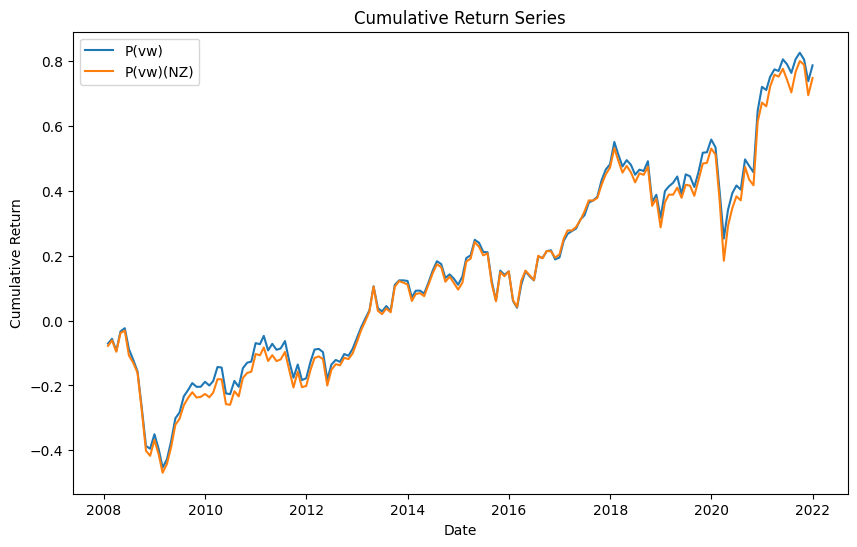

In [355]:
# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_return_vw, label='P(vw)')
plt.plot(cumulative_return_decarb_NZ, label='P(vw)(NZ)')

plt.title('Cumulative Return Series')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [356]:
df_Rf_full = pd.read_csv('https://raw.githubusercontent.com/YUEWU1233/Pacific-firms-with-available-scope-1-to-3-carbon-emissions/main/Rf.csv')
df_Rf_full['DATE'] = pd.to_datetime(df_Rf_full['DATE']) # Convert 'DATE' to datetime
df_Rf_full.rename(columns={'RIFLGFCM01NA': 'Annulized Rf'}, inplace=True)
df_Rf_full.set_index('DATE', inplace=True) # Set 'DATE' as the index
df_Rf = df_Rf_full[(df_Rf_full.index.year >= 2008) & (df_Rf_full.index.year <= 2021)]
annualized_rf = df_Rf['Annulized Rf'].mean()/100

def calculate_portfolio_metrics(monthly_returns):
    """calculate and return the metrics: annualized avg return, annualized volality, sharpe ratio, Min/Max rr"""
    annualized_return = monthly_returns.mean() * 12
    annualized_volatility = monthly_returns.std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - annualized_rf) / annualized_volatility
    min_return = monthly_returns.min()
    max_return = monthly_returns.max()

    return annualized_return, annualized_volatility, sharpe_ratio, min_return, max_return

# for P(gmv)
#metrics_portfolio = calculate_portfolio_metrics(portfolio_monthly_returns)



# for P(vw)(NZ)
metrics_decarb_NZ = calculate_portfolio_metrics(portfolio_decarb_monthly_returns_NZ)

# create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'P(vw)(NZ)': metrics_decarb_NZ
}, index=['Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Min Return', 'Max Return'])

print(metrics_df)





                       P(vw)(NZ)
Annualized Return       0.052989
Annualized Volatility   0.160231
Sharpe Ratio            0.298698
Min Return             -0.175055
Max Return              0.138296


In [357]:
# cumulative returns
cumulative_return_portfolio = (1 + portfolio_monthly_returns).cumprod() - 1
cumulative_return_decarb_NZ = (1 + portfolio_decarb_monthly_returns_NZ).cumprod() - 1
cumulative_return_vw = (1 + portfolio_monthly_returns_vw).cumprod() - 1

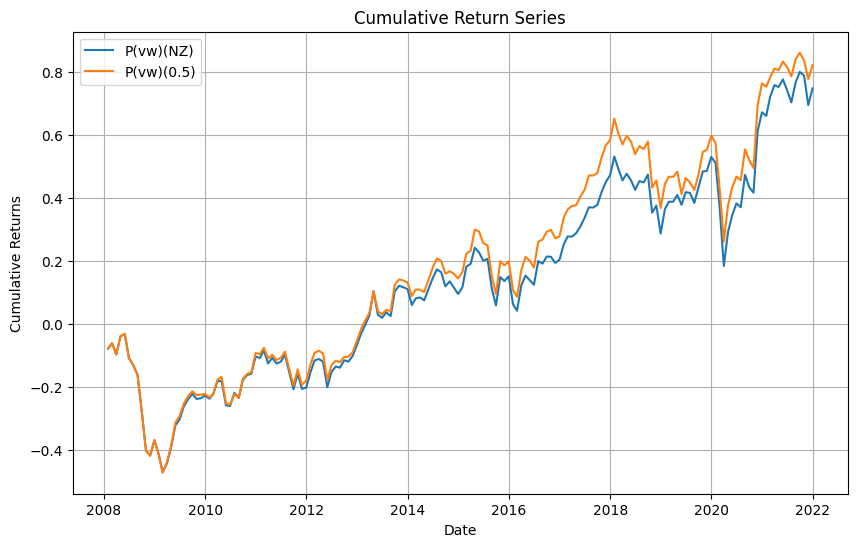

In [358]:
# Plotting the cumulative returns of the three portfolios
plt.figure(figsize=(10, 6))
plt.plot(cumulative_return_decarb_NZ, label="P(vw)(NZ)")
plt.plot(cumulative_return_decarb, label="P(vw)(0.5)")
#plt.plot(cumulative_return_vw, label='P(vw)')
#plt.plot(cumulative_return_vw, label='P(vw)')
plt.title("Cumulative Return Series")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()


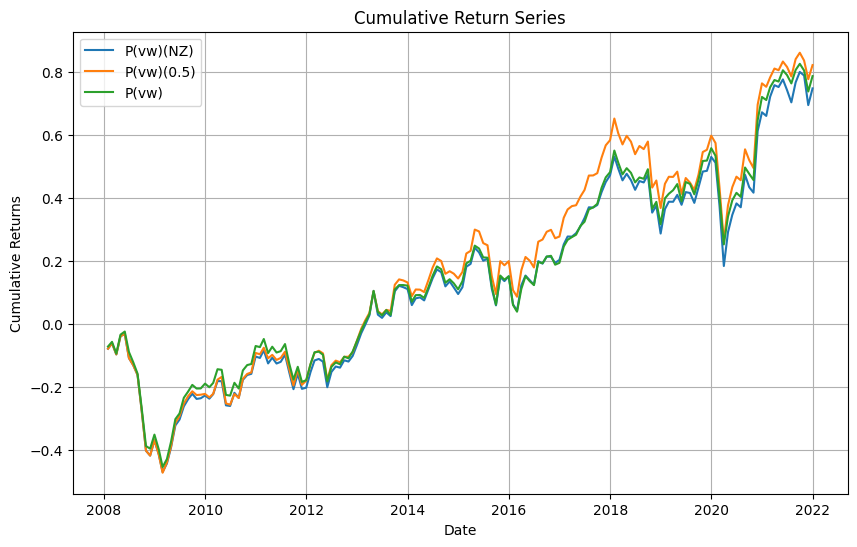

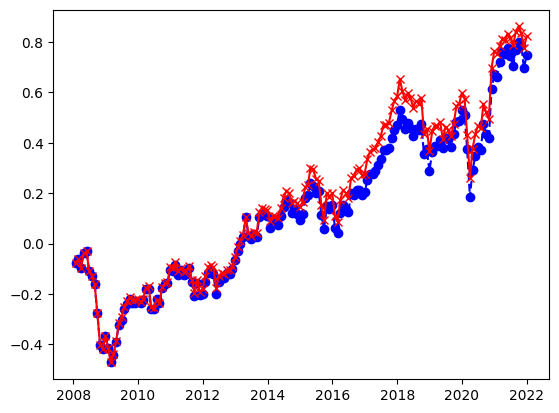

In [359]:
import matplotlib.pyplot as plt


# Plotting the cumulative returns of the three portfolios
plt.figure(figsize=(10, 6))
plt.plot(cumulative_return_decarb_NZ, label="P(vw)(NZ)")
plt.plot(cumulative_return_decarb, label="P(vw)(0.5)")
plt.plot(cumulative_return_vw, label='P(vw)')
#plt.plot(cumulative_return_vw, label='P(vw)')
plt.title("Cumulative Return Series")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(cumulative_return_decarb_NZ, label="P(vw)(NZ)", color='blue', linestyle='--', marker='o')
plt.plot(cumulative_return_decarb, label="P(vw)(0.5)", color='red', linestyle='-', marker='x')
